# PROJET ANALYSE DE DONNEES
#### Etude des stations de location de vélos dans Paris

In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

%matplotlib inline

Les données suivants représentent le taux de disponibilité des vélos dans toutes les stations de Paris. Nous avons accés à cette valeur toutes les heures de chaque jour de la semaine sur la période du 2 septembre au 7 septembre 2014.

Plus le taux est proche de 1 plus la stations a de vélos disponibles. Inversement, quand ce taux est proche de 0 alors il y a de moins en moins de vélos libres dans la station.

## Présentation des données

Nous allons ici importer toutes les données mises à notre disposition.

In [2]:
loading = pd.read_csv('data/velibLoading.csv', sep = " ")

loading


,Lun-00,Lun-01,Lun-02,Lun-03,Lun-04,Lun-05,Lun-06,Lun-07,Lun-08,Lun-09,...,Dim-14,Dim-15,Dim-16,Dim-17,Dim-18,Dim-19,Dim-20,Dim-21,Dim-22,Dim-23
1,0.038462,0.038462,0.076923,0.038462,0.038462,0.038462,0.038462,0.038462,0.107143,0.000000,...,0.296296,0.111111,0.111111,0.148148,0.307692,0.076923,0.115385,0.076923,0.153846,0.153846
2,0.478261,0.478261,0.478261,0.434783,0.434783,0.434783,0.434783,0.434783,0.260870,0.043478,...,0.043478,0.000000,0.217391,0.130435,0.045455,0.173913,0.173913,0.173913,0.260870,0.391304
3,0.218182,0.145455,0.127273,0.109091,0.109091,0.109091,0.090909,0.090909,0.054545,0.109091,...,0.259259,0.259259,0.203704,0.129630,0.148148,0.296296,0.314815,0.370370,0.370370,0.407407
4,0.952381,0.952381,0.952381,0.952381,0.952381,0.952381,0.952381,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.904762,0.857143,0.857143,0.857143,0.761905,0.761905,0.761905,0.761905
5,0.927536,0.811594,0.739130,0.724638,0.724638,0.724638,0.724638,0.724638,0.753623,0.971014,...,0.227273,0.454545,0.590909,0.833333,1.000000,0.818182,0.636364,0.712121,0.621212,0.575758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.000000,0.090909,0.136364,0.000000,...,0.043478,0.173913,0.043478,0.086957,0.086957,0.304348,0.304348,0.130435,0.086957,0.086957
1186,0.200000,0.133333,0.155556,0.177778,0.177778,0.177778,0.200000,0.177778,0.288889,0.511111,...,0.266667,0.288889,0.155556,0.222222,0.333333,0.311111,0.355556,0.377778,0.333333,0.355556
1187,0.551724,0.517241,0.551724,0.517241,0.517241,0.551724,0.551724,0.448276,0.241379,0.034483,...,0.482759,0.310345,0.000000,0.000000,0.103448,0.379310,0.310345,0.310345,0.344828,0.482759
1188,0.476190,0.428571,0.428571,0.428571,0.428571,0.428571,0.476190,0.523810,0.428571,0.476190,...,0.880000,0.760000,0.750000,0.958333,1.000000,0.791667,0.791667,0.500000,0.434783,0.478261


Il y a 168 colonnes qui représentent le total des heures dans une semaine. Les 1189 lignes correspondent aux données de toutes les stations de Paris que nous étudions ici.

In [3]:
loading.describe()

,Lun-00,Lun-01,Lun-02,Lun-03,Lun-04,Lun-05,Lun-06,Lun-07,Lun-08,Lun-09,...,Dim-14,Dim-15,Dim-16,Dim-17,Dim-18,Dim-19,Dim-20,Dim-21,Dim-22,Dim-23
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,...,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,0.401503,0.408770,0.411718,0.415161,0.417136,0.421650,0.419860,0.415729,0.384658,0.326331,...,0.346147,0.325526,0.311334,0.306399,0.314730,0.334080,0.353493,0.385975,0.392552,0.397529
std,0.337079,0.335566,0.336132,0.337158,0.332237,0.326644,0.323422,0.319302,0.303621,0.314026,...,0.340516,0.339897,0.336863,0.331194,0.322904,0.317279,0.317572,0.328448,0.335061,0.341536
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.093750,0.093023,0.096774,0.100000,0.108696,0.114286,0.114286,0.117647,0.114286,0.047619,...,0.051282,0.041667,0.038462,0.043478,0.052632,0.071429,0.080000,0.095238,0.086957,0.090909
50%,0.312500,0.333333,0.342857,0.350000,0.357143,0.363636,0.360000,0.360000,0.320000,0.215385,...,0.204082,0.166667,0.151515,0.142857,0.172414,0.200000,0.238095,0.285714,0.292683,0.292683
75%,0.694444,0.705882,0.708333,0.710526,0.700000,0.700000,0.700000,0.687500,0.636364,0.575000,...,0.651163,0.608696,0.555556,0.550000,0.550000,0.558140,0.600000,0.666667,0.666667,0.692308
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Les 168 colonnes represéntent comme précedemment chaque heure d'une semaine. Les lignes correspondent à differentes données calculées sur toutes les stations chaque heure.

Nous allons maintenant importer les coordonnées géographiques de chaque stations. 

In [4]:
coord = pd.read_csv('data/velibCoord.csv', sep = " ")

coord.head()

,longitude,latitude,bonus,names
1,2.377389,48.886300,0,EURYALE DEHAYNIN
2,2.317591,48.890020,0,LEMERCIER
3,2.330447,48.850297,0,MEZIERES RENNES
4,2.271396,48.833734,0,FARMAN
5,2.366897,48.845887,0,QUAI DE LA RAPEE


Grace à la commande ".head", nous avons affiché seulement les 5 premières lignes du tableau "coord".

## Analyse descriptive des données

Nous regardons dans cette cellule si certaines données sont manquantes, si certaines cases sont vides. 

In [5]:
print("Nombre de données manquantes dans 'loading':")
print(loading.isna().sum().sum())
print("Nombre de données manquantes dans 'coord':")
print(coord.isna().sum().sum())

Nombre de données manquantes dans 'loading':
0
Nombre de données manquantes dans 'coord':
0


Or ici, le résultat obtenu pour chaque tableau "loading" et "coord" est 0, il n'y a donc pas de donnée manquante ! 

In [6]:
loading_missing_value = loading.isna().sum().sort_values(ascending=False)

print("--- Somme des valeurs manquantes dans 'Loading' ---")
print(loading_missing_value.sum())

# --- #
print('')

coord_missing_value = coord.isna().sum().sort_values(ascending=False)

print("--- Somme des valeurs manquantes dans 'Coord' ---")
print(coord_missing_value)

--- Somme des valeurs manquantes dans 'Loading' ---
0

--- Somme des valeurs manquantes dans 'Coord' ---
longitude    0
latitude     0
bonus        0
names        0
dtype: int64


Nous affichons ici le nombre d'occurance de chaque station dans nos données.

In [7]:
station_name = coord.names.value_counts()
print(station_name)


 PORTE DES LILAS                 3
 GARE D'AUSTERLITZ               3
 PORTE DE BAGNOLET               2
 CHERCHE MIDI                    2
 LEGENDRE                        2
                                ..
 BEL AIR                         1
 ASSAS LUXEMBOURG                1
 COURS DE VINCENNES BD DAVOUT    1
 RUISSEAU ORDENER                1
 QUAI VOLTAIRE                   1
Name: names, Length: 1161, dtype: int64


On peut voir dans le tableau suivant que le nom de station qui apparait 3 fois correspond à des stations dont les coordonnées géographiques sont différentes.

In [8]:
name = station_name.index[0]
coord[coord.names == name]

,longitude,latitude,bonus,names
362,2.404770,48.876604,1,PORTE DES LILAS
450,2.405960,48.875412,1,PORTE DES LILAS
957,2.411046,48.878099,1,PORTE DES LILAS


Observons tout d'abord que les différentes moyennes des stations ne sont pas du tout homogène, et qu'il est donc, intéressant de regarder d'un peu plus près les différentes moyennes observées pour avoir une vision globale de l'impact des heures, jours et de la localisation des stations sur la comportement d'utilisation.

En effet, dans le graphe suivant, il est possible de voir que le taux de chargement moyen varie énormément.

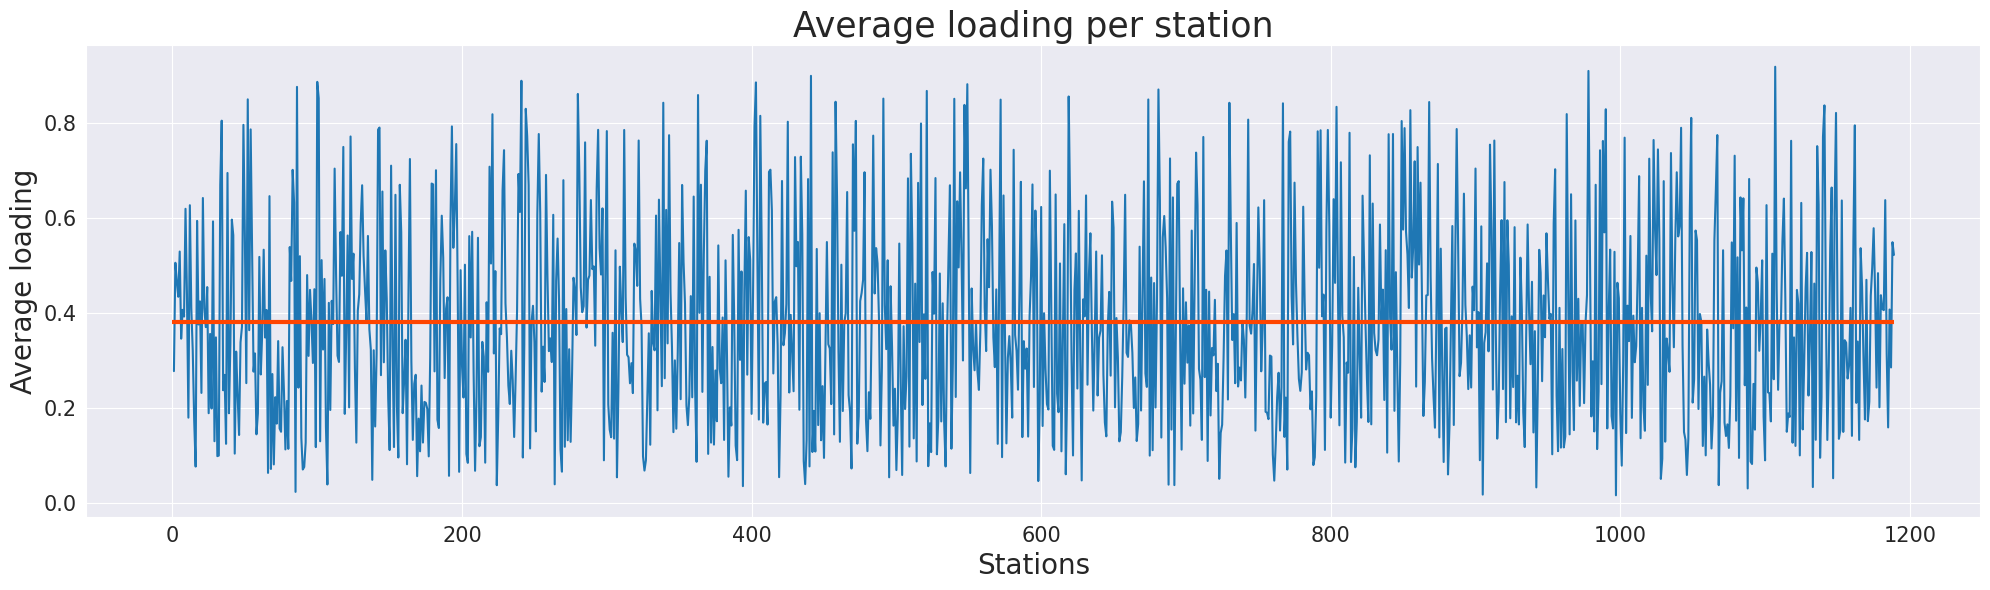

In [9]:
loading_mean = pd.Series(loading.mean(axis=1))
# %load solutions/Python/plot_mean_stations.py
n_stations = loading.shape[0]  # number of observed stations
stations   = np.arange(n_stations)

plt.figure(figsize = (20,6))

# --- #

plt.plot(loading_mean)
plt.hlines(y = loading.mean().mean(), xmin=0, xmax=n_stations, 
           colors = "OrangeRed", linewidth = 3)

# --- #

plt.xlabel('Stations', fontsize = 20)
plt.ylabel('Average loading', fontsize = 20)
plt.title("Average loading per station", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.tight_layout()
plt.show()

Les moyennes : 
    - Moyenne par heure par jour 
    - Station la + utilisée par jour
    - Station la - utilisée par jour 
    - Station la + utilisée par semaine 
    - Station la - utilisée par semaine 
    - heure la plus creuse d'utilisation (ie le taux est proche de 1 car tous les vélos sont à la station)
    - heure la + fréquentée (ie le taux est proche de 0)
    - jour le + fréquenté

- Moyenne par heure par jour 

- Taux d'utilisation en moyenne sur l'ensemble des heures, jours et stations, nous donne une idée globale sur l'utilisation parisienne des vélib

On affiche dans le cadre suivant la moyenne de chargement totale sur toutes les stations au cours de la semaine.

In [10]:
print(loading.mean().mean())

0.3816217759807477


On cherche à déterminer maintenant la station la plus fréquentée, en moyenne par semaine.

In [11]:
mean=loading.mean(axis=1)
i = mean.idxmin()
print('Average fill rate :',mean[i])
print(coord.loc[i])

Average fill rate : 0.016132842025699153
longitude              2.427934
latitude              48.873929
bonus                         1
names         HORNET (BAGNOLET)
Name: 997, dtype: object


On cherche à déterminer maintenant la station la moins fréquentée, en moyenne par semaine.

In [12]:
mean=loading.mean(axis=1)
i = mean.idxmax()
print('Average fill rate :',mean[i])
print(coord.loc[i])

Average fill rate : 0.9193722943722953
longitude                          2.398262
latitude                           48.81466
bonus                                     0
names         INSURRECTION AOUT 1944 (IVRY)
Name: 1107, dtype: object


Le graphe suivant illustre le taux de chargement moyen dans tout Paris, sur la journée et pour chaque jour de la semaine.

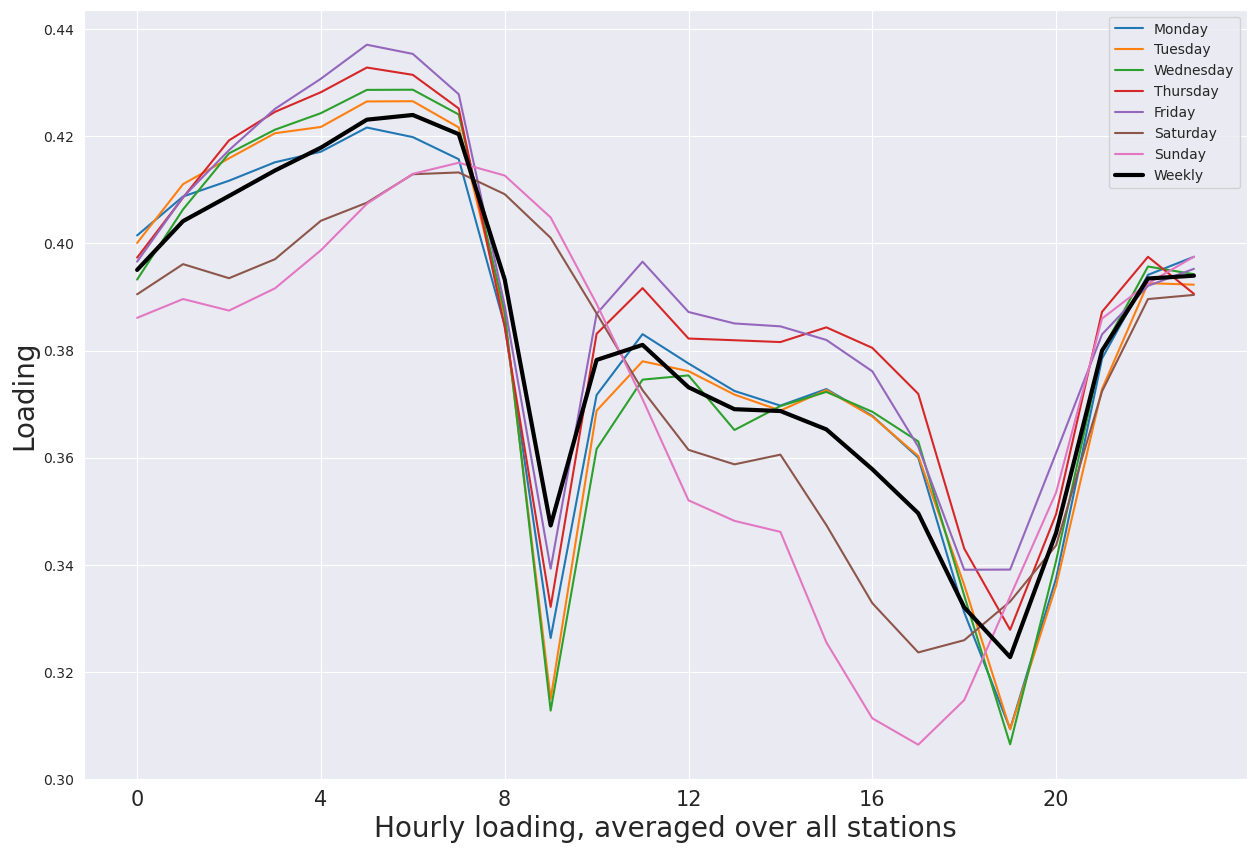

In [13]:
mean_per_hour_per_day = loading.mean(axis = 0).to_numpy()
mean_per_hour_per_day = mean_per_hour_per_day.reshape((7, 24))

mean_per_hour = mean_per_hour_per_day.mean(axis=0)

# --- #

days = ["Monday", "Tuesday", "Wednesday","Thursday", "Friday", "Saturday", "Sunday"]
plt.figure(figsize = (15,10))

plt.plot(mean_per_hour_per_day.transpose())
plt.plot(mean_per_hour, color = "black", linewidth = 3)

plt.xlabel('Hourly loading, averaged over all stations', fontsize = 20)
plt.ylabel('Loading', fontsize = 20)
plt.legend(days + ['Weekly'])
plt.xticks(ticks = np.arange(0,24,4), labels=np.arange(0,24,4), fontsize = 15)
  
plt.tight_layout
plt.show()

#A faire !!!!
#recup la moyenne la plus basse par jour 
#np.min(mean_per_hour)

#recup la moyenne la plus haute par jour 
#mean_per_hour.idmax()

#Commentaire général: cela nous permet de connaître les heures d'influence globale de l'utilisation des vélos

On peut ainsi voir en moyenne, à quelle heure le taux est le plus haut et à quelle heure il est le plus bas. On déduit donc qu'aux alentours de 2h-4h du matin les vélos ne sont pas beaucoup empruntés. Cependant, on peut voir qu'à 9h environ les vélos sont davantage empruntés, idem entre 19h et 20h. Ce résultat s'explique par les heures de travail de la population qui part le matin en vélo et rentre en fin de journée. 

On souhaite savoir, en moyenne, quel est le jour de la semaine, durant lequel les gens utilisent le + les vélos 
=> il faut récupérer les différentes moyennes par jour et prendre la plus faible (ie le - de vélos à la station)

#Deux options:

#option1= 1:
days = ["Lun", "Mar", "Mer","Jeu", "Ven", "Sam", "Dim"]

for i in range(7):
    lundi = [c for c in loading.columns.tolist() if c.startswith(days[i])]
    loading[lundi].mean(axis=1)
    
# faire une liste avec les mots rep des colonnes puis les mettre dans une autre liste pour calculer la moyenne


#option 2:
cols_24 = loading.columns[:24]

# Calculer la moyenne des 24 premières colonnes pour chaque individu
mean_24 = df[cols_24].mean(axis=1)

## ACP 

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

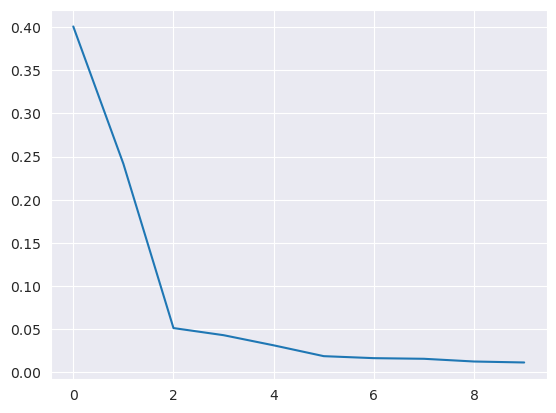

In [15]:
pca = PCA()
## Estimation, calcul des composantes principales
C = pca.fit(loading).transform(loading)
## Décroissance de la variance expliquée
plt.plot(pca.explained_variance_ratio_[0:10])
plt.show()

In [16]:
sum=0
d=0
while sum<0.85:
    d=d+1
    pca=PCA(n_components=d)
    X=pca.fit_transform(loading)
    sum=np.sum(pca.explained_variance_ratio_)
print(sum)
print(d)

0.8531865862552659
11


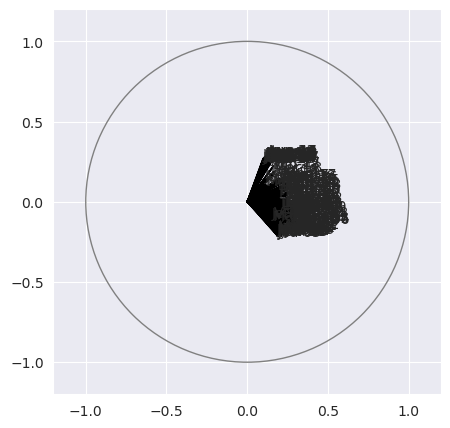

In [17]:
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, loading.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

In [18]:
import matplotlib.pyplot as plt
"""
# Supposons que vous ayez déjà effectué PCA sur vos données et obtenu un objet PCA nommé pca
# X est votre jeu de données

# Entraînement de PCA sur les données
pca.fit(loading)

# Obtention des vecteurs propres (composantes principales)
eigenvectors = pca.components_

# Création d'un graphique biplot
plt.figure(figsize=(8, 8))
plt.scatter(pca[:, 0], X_pca[:, 1], alpha=0.6)  # Représentation des observations dans l'espace PCA

# Représentation des vecteurs propres
for i, (x, y) in enumerate(zip(eigenvectors[0, :], eigenvectors[1, :])):
    plt.arrow(0, 0, x, y, color='r', alpha=0.5)  # Trace les vecteurs propres
    plt.text(x, y, f'Variable {i+1}', fontsize=12, ha='right', va='bottom', color='r')  # Ajoute le nom de la variable à chaque vecteur propre

plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.title('Biplot avec vecteurs propres')
plt.grid(True)
plt.show()
"""

TypeError: 'PCA' object is not subscriptable

<Figure size 800x800 with 0 Axes>

In [ ]:
"""
pca = PCA(n_components=11)
X=pca.fit_transform(loading)
eigenvectors = pca.components_
print(eigenvectors)
plt.plot(eigenvectors[0,:])
plt.plot(eigenvectors[1,:])
plt.plot(eigenvectors[2,:])
plt.xlabel('Time', fontsize = 15)
plt.ylabel('??', fontsize = 15)
plt.title("1ere composante", fontsize = 15)
time_tick  = np.linspace(1, 168, 8)
plt.vlines(x = time_tick, ymin = 0, ymax = 0.15, 
           colors = "Orange", linestyle = "dotted", linewidth = 5)

#A GARDER cf feuille de notes
"""

In [ ]:
"""
plt.plot(X[0,:])
plt.plot(X[1,:])
plt.plot(X[2,:])
plt.plot(X[100,:])
#projection du premier individu sur les différents vp, conclusion = trop dur à analyser
"""

In [ ]:
"""
pca = PCA(n_components=11)
X=pca.fit_transform(loading)
eigenvectors = pca.components_
print(eigenvectors)
plt.plot(eigenvectors[1,:])
plt.xlabel('Time', fontsize = 15)
plt.ylabel('??', fontsize = 15)
plt.title("2ème composante", fontsize = 15)
time_tick  = np.linspace(1, 168, 8)
plt.vlines(x = time_tick, ymin = -0.15, ymax = 0.15, 
           colors = "Orange", linestyle = "dotted", linewidth = 5)

In [ ]:
"""cols_24 = loading.columns[:24]

# Calculer la moyenne des 24 premières colonnes pour chaque individu
mean_24 = df[cols_24].mean(axis=1)"""

In [ ]:
"""
b =loading.mean(axis=0).to_numpy()
c = b.reshape((7,24))
#new_df = np.mean(loading.reshape(-1,7,24),axis=0).to_numpy()
#a = loading.mean(axis=1)
#a
"""

### ACP by TP methods

On commence par standardiser les données afin de centrer et de réduire les données. Afficher les données sur un jour par ex (bcp de variance apparemment)

In [19]:
from sklearn.preprocessing import StandardScaler

# Standardiser les données quantitatives
scaler = StandardScaler()
loading_standardise = scaler.fit_transform(loading)

# Créer un nouveau DataFrame avec les données standardisées et seulement les variables quantitatives!
data_standardise = pd.DataFrame(loading_standardise, columns=loading.columns)


# Concaténer les colonnes qualitatives avec les données standardisées
#df_final = pd.concat([df[['col_qualitative_1', 'col_qualitative_2']], df_standardise], axis=1)

# Afficher le DataFrame final avec les variables standardisées pour les colonnes quantitatives
#print(df_final)


In [20]:
# ACP sur toutes les données : 

In [21]:
from sklearn.decomposition import PCA

pca = PCA()
loading_pca = pca.fit_transform(loading)

on garde 11 composants pour le PCA


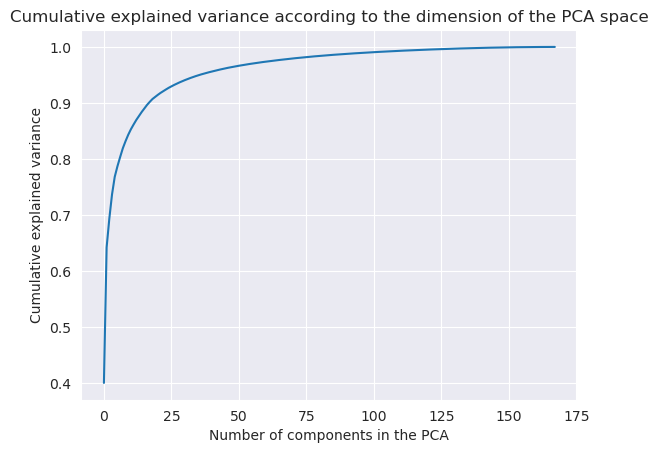

In [22]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.title('Cumulative explained variance according to the dimension of the PCA space')
plt.xlabel('Number of components in the PCA')
plt.ylabel('Cumulative explained variance');


#permet de connaître le nombre de variables à garder pour expliquer 90% de la variance 

#pca = PCA(0.90).fit(loading) 

pca = PCA(0.85).fit(loading) #pour savoir directement le nombre de composants nécessaire pour représenter une explication de 85% de la variance
pca.n_components_ #on affiche le nb de composants qu'on garde pour la PCA
print(f"on garde {pca.n_components_} composants pour le PCA")

Cependant garder 11 composantes semblent beaucoup trop, en effet quand on regarde l'histogramme des pourcentage de représentation de chaque composante, on voit qu'après la 5è composante celles-ci n'explique que très peu la variance.

In [23]:
pca = PCA(n_components=5)

loading_pca = pca.fit_transform(loading) #même chose que fit puis transform dans notre cas à nous

print(100*pca.explained_variance_ratio_)


print('--- PCA ---')
print('Initial dimension:', loading.shape)
print('Dimension after projection:', loading_pca.shape)

print('')

print('--- Explained variance ---')
print('Component 1:', round(pca.explained_variance_[0],2), 'i.e.', round(100*pca.explained_variance_ratio_[0],2), '% of the total variance')
print('Component 2:', round(pca.explained_variance_[1],2), 'i.e.', round(100*pca.explained_variance_ratio_[1],2), '% of the total variance')
print('Component 3:', round(pca.explained_variance_[2],2), 'i.e.', round(100*pca.explained_variance_ratio_[2],2), '% of the total variance')


[40.07166651 24.16919541  5.13413329  4.30937348  3.13423758]
--- PCA ---
Initial dimension: (1189, 168)
Dimension after projection: (1189, 5)

--- Explained variance ---
Component 1: 7.98 i.e. 40.07 % of the total variance
Component 2: 4.81 i.e. 24.17 % of the total variance
Component 3: 1.02 i.e. 5.13 % of the total variance


On affiche l'histogramme de ce que chaque variable explique dans le modèle

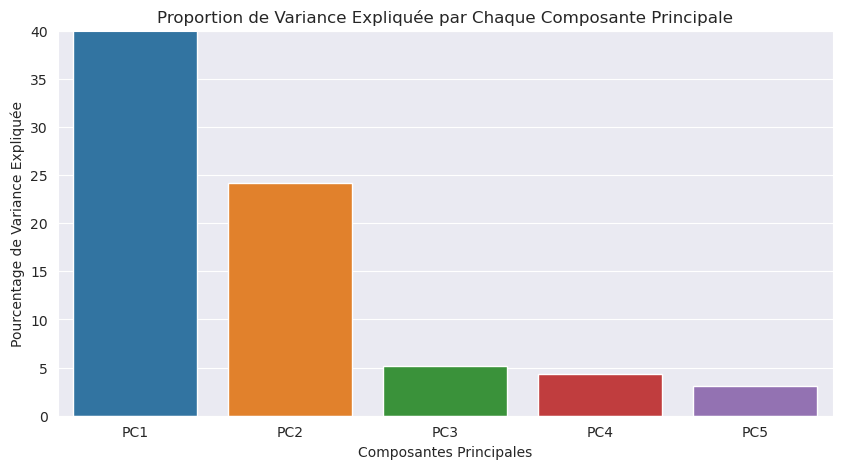

In [24]:
plt.figure(figsize=(10, 5))
sns.barplot(x=[f"PC{i+1}" for i in range(len(pca.explained_variance_ratio_))], y=pca.explained_variance_ratio_ * 100)
plt.xlabel("Composantes Principales")
plt.ylabel("Pourcentage de Variance Expliquée")
plt.title("Proportion de Variance Expliquée par Chaque Composante Principale")
plt.ylim(0, 40)  # limiter l'axe y à la plage spécifiée
plt.show()

Représentation de la PCA : projection des données sur les axes des deux composantes principales :

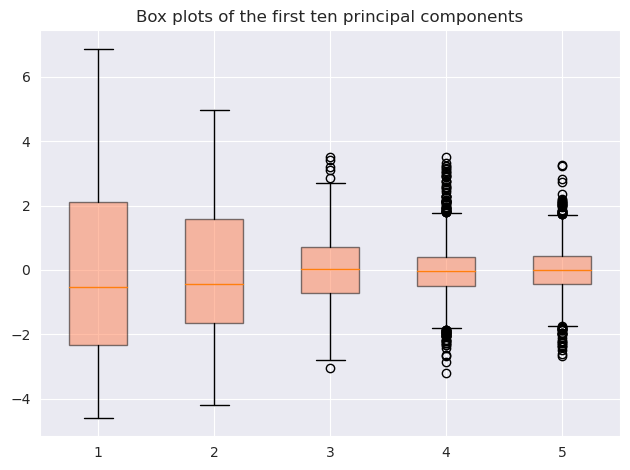

In [25]:
box = plt.boxplot(loading_pca[:,:10], patch_artist=True)
plt.setp(box["boxes"], facecolor="coral", alpha=.5)
plt.title("Box plots of the first ten principal components")
plt.tight_layout()
plt.show()

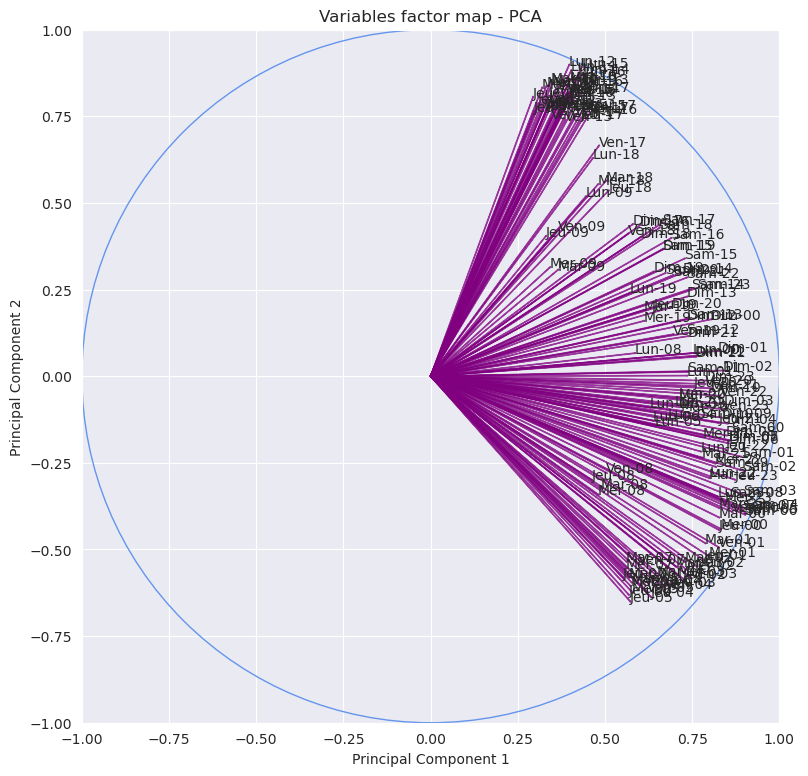

In [26]:
coord1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord2 = pca.components_[1] * np.sqrt(pca.explained_variance_[1])

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1)

arrow_length_factor = 3
# Facteur de longueur des flèches

for i, j, nom in zip(coord1, coord2, loading.columns):
    plt.text(i*arrow_length_factor, j*arrow_length_factor, nom, fontsize=10)
    plt.arrow(0, 0, i* arrow_length_factor, j* arrow_length_factor, color = 'purple', alpha=0.7, width = 0.001)

plt.axis((-1, 1, -1, 1))
plt.gcf().gca().add_artist(plt.Circle((0, 0), radius = 1, color = 'cornflowerblue', fill = False))

plt.title('Variables factor map - PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.grid(True)
plt.show()



In [27]:
# ACP par jour
loading


,Lun-00,Lun-01,Lun-02,Lun-03,Lun-04,Lun-05,Lun-06,Lun-07,Lun-08,Lun-09,...,Dim-14,Dim-15,Dim-16,Dim-17,Dim-18,Dim-19,Dim-20,Dim-21,Dim-22,Dim-23
1,0.038462,0.038462,0.076923,0.038462,0.038462,0.038462,0.038462,0.038462,0.107143,0.000000,...,0.296296,0.111111,0.111111,0.148148,0.307692,0.076923,0.115385,0.076923,0.153846,0.153846
2,0.478261,0.478261,0.478261,0.434783,0.434783,0.434783,0.434783,0.434783,0.260870,0.043478,...,0.043478,0.000000,0.217391,0.130435,0.045455,0.173913,0.173913,0.173913,0.260870,0.391304
3,0.218182,0.145455,0.127273,0.109091,0.109091,0.109091,0.090909,0.090909,0.054545,0.109091,...,0.259259,0.259259,0.203704,0.129630,0.148148,0.296296,0.314815,0.370370,0.370370,0.407407
4,0.952381,0.952381,0.952381,0.952381,0.952381,0.952381,0.952381,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.904762,0.857143,0.857143,0.857143,0.761905,0.761905,0.761905,0.761905
5,0.927536,0.811594,0.739130,0.724638,0.724638,0.724638,0.724638,0.724638,0.753623,0.971014,...,0.227273,0.454545,0.590909,0.833333,1.000000,0.818182,0.636364,0.712121,0.621212,0.575758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.000000,0.090909,0.136364,0.000000,...,0.043478,0.173913,0.043478,0.086957,0.086957,0.304348,0.304348,0.130435,0.086957,0.086957
1186,0.200000,0.133333,0.155556,0.177778,0.177778,0.177778,0.200000,0.177778,0.288889,0.511111,...,0.266667,0.288889,0.155556,0.222222,0.333333,0.311111,0.355556,0.377778,0.333333,0.355556
1187,0.551724,0.517241,0.551724,0.517241,0.517241,0.551724,0.551724,0.448276,0.241379,0.034483,...,0.482759,0.310345,0.000000,0.000000,0.103448,0.379310,0.310345,0.310345,0.344828,0.482759
1188,0.476190,0.428571,0.428571,0.428571,0.428571,0.428571,0.476190,0.523810,0.428571,0.476190,...,0.880000,0.760000,0.750000,0.958333,1.000000,0.791667,0.791667,0.500000,0.434783,0.478261


On regroupe les données par jour de la semaine afin de faire une ACP sur ces données déjà regrouper par jour. Donc on calcul la moyenne du taux pour le jour 1 ie lundi, de m^me pour tous les autres jours.

In [28]:
lundi = loading.iloc[:, list(range(0, 24))].mean(axis=1)
mardi = loading.iloc[:, list(range(24, 48))].mean(axis=1)
mercredi = loading.iloc[:, list(range(48, 72))].mean(axis=1)
jeudi = loading.iloc[:, list(range(72, 96))].mean(axis=1)
vendredi = loading.iloc[:, list(range(96, 120))].mean(axis=1)
samedi = loading.iloc[:, list(range(120, 144))].mean(axis=1)
dimanche = loading.iloc[:, list(range(144, 168))].mean(axis=1)

data_jours = pd.DataFrame({
    'lundi': lundi,
    'mardi': mardi,
    'mercredi': mercredi,
    'jeudi': jeudi,
    'vendredi': vendredi,
    'samedi': samedi,
    'dimanche': dimanche
})

print(data_jours)

#standardiser data_jours

         lundi     mardi  mercredi     jeudi  vendredi    samedi  dimanche
1     0.111149  0.296462  0.378527  0.361387  0.418596  0.244819  0.134081
2     0.342391  0.579710  0.510870  0.572464  0.528986  0.605072  0.404068
3     0.273874  0.626680  0.389394  0.456818  0.571731  0.532141  0.416667
4     0.759921  0.367063  0.309193  0.330260  0.311508  0.311508  0.652778
5     0.736609  0.608376  0.550716  0.450216  0.598082  0.356832  0.408460
...        ...       ...       ...       ...       ...       ...       ...
1185  0.027668  0.168478  0.226449  0.307724  0.077899  0.155797  0.150362
1186  0.252778  0.345370  0.499074  0.606481  0.325000  0.405556  0.419444
1187  0.273420  0.206944  0.336111  0.280556  0.213889  0.173755  0.514368
1188  0.666667  0.809524  0.429762  0.091667  0.245000  0.750000  0.854363
1189  0.790911  0.489645  0.471711  0.440104  0.328027  0.460265  0.679703

[1189 rows x 7 columns]


In [29]:
## diviser loading par jour puis ensuite standardiser 
## pour acm utiliser les données non standardisées pour pas avoir de Nan et puis standardiser
# Calcul des moyennes pour chaque jour de la semaine
lundi = loading.standardise[:, list(range(0, 24))].mean(axis=1)
mardi = loading[:, list(range(24, 48))].mean(axis=1)
mercredi = loading[:, list(range(48, 72))].mean(axis=1)
jeudi = loading[:, list(range(72, 96))].mean(axis=1)
vendredi = loading[:, list(range(96, 120))].mean(axis=1)
samedi = loading[:, list(range(120, 144))].mean(axis=1)
dimanche = loading[:, list(range(144, 168))].mean(axis=1)

# Création du nouveau DataFrame
data_jours = pd.DataFrame({
    'lundi': lundi,
    'mardi': mardi,
    'mercredi': mercredi,
    'jeudi': jeudi,
    'vendredi': vendredi,
    'samedi': samedi,
    'dimanche': dimanche
})

print(data_jours)

AttributeError: 'DataFrame' object has no attribute 'standardise'

In [ ]:
pca_2 = PCA()
data_jours_pca = pca_2.fit_transform(data_jours)

In [ ]:


plt.plot(np.cumsum(pca_2.explained_variance_ratio_))

plt.title('Cumulative explained variance according to the dimension of the PCA space')
plt.xlabel('Number of components in the PCA')
plt.ylabel('Cumulative explained variance');


#permet de connaître le nombre de variables à garder pour expliquer 90% de la variance 

#pca = PCA(0.90).fit(loading) 

pca_2 = PCA(0.85).fit(data_jours) #pour savoir directement le nombre de composants nécessaire pour représenter une explication de 85% de la variance
pca_2.n_components_ #on affiche le nb de composants qu'on garde pour la PCA
print(f"on garde {pca_2.n_components_} composants pour le PCA")



In [ ]:
pca_2=PCA(n_components=2)
data_jours_pca = pca_2.fit_transform(data_jours) #même chose que fit puis transform dans notre cas à nous

print(100*pca_2.explained_variance_ratio_)


print('--- PCA ---')
print('Initial dimension:', data_jours.shape)
print('Dimension after projection:', data_jours_pca.shape)

print('')

print('--- Explained variance ---')
print('Component 1:', round(pca_2.explained_variance_[0],2), 'i.e.', round(100*pca_2.explained_variance_ratio_[0],2), '% of the total variance')
print('Component 2:', round(pca_2.explained_variance_[1],2), 'i.e.', round(100*pca_2.explained_variance_ratio_[1],2), '% of the total variance')


In [30]:
plt.figure(figsize=(10, 5))
sns.barplot(x=[f"PC{i+1}" for i in range(len(pca_2.explained_variance_ratio_))], y=pca_2.explained_variance_ratio_ * 100)
plt.xlabel("Composantes Principales")
plt.ylabel("Pourcentage de Variance Expliquée")
plt.title("Proportion de Variance Expliquée par Chaque Composante Principale")
plt.ylim(0, 80)  # limiter l'axe y à la plage spécifiée
plt.show()

NameError: name 'pca_2' is not defined

<Figure size 1000x500 with 0 Axes>

In [31]:
box = plt.boxplot(data_jours_pca[:,:10], patch_artist=True)
plt.setp(box["boxes"], facecolor="coral", alpha=.5)
plt.title("Box plots of the first ten principal components")
plt.tight_layout()
plt.show()


NameError: name 'data_jours_pca' is not defined

In [32]:


coord1 = pca.components_[0] * np.sqrt(pca_2.explained_variance_[0])
coord2 = pca.components_[1] * np.sqrt(pca_2.explained_variance_[1])

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1)


arrow_length_factor = 5

for i, j, nom in zip(coord1, coord2, data_jours.columns):
    plt.text(i*arrow_length_factor, j*arrow_length_factor, nom, fontsize=10)
    plt.arrow(0, 0, i* arrow_length_factor, j* arrow_length_factor, color = 'purple', alpha=0.7, width = 0.001)

plt.axis((-1, 1, -1, 1))
plt.gcf().gca().add_artist(plt.Circle((0, 0), radius = 1, color = 'cornflowerblue', fill = False))

plt.title('Variables factor map - PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.grid(True)
plt.show()



NameError: name 'pca_2' is not defined

ACP nous dit donc que l'on peut ecpliquer les jours de la semaine avec deux variables au lieu de 7, pour expliquer + de 90% de la variance. Cependant comme pour l'ACP précédente les affichages sont pas jolis.

In [33]:
# ACP par heure de la journée

In [34]:
# Calcul des moyennes pour chaque heure de la journée
minuit_am = loading_standardise[:, [0, 24, 48, 72, 96, 120, 144]].mean(axis=1)
une_am = loading_standardise[:, [1, 25, 49, 73, 97, 121, 145]].mean(axis=1)
deux_am = loading_standardise[:, [2, 26, 50, 74, 98, 122, 146]].mean(axis=1)
trois_am = loading_standardise[:, [3, 27, 51, 75, 99, 123, 147]].mean(axis=1)
quatre_am = loading_standardise[:, [4, 28, 52, 76, 100, 124, 148]].mean(axis=1)
cinq_am = loading_standardise[:, [5, 29, 53, 77, 101, 125, 149]].mean(axis=1)
six_am = loading_standardise[:, [6, 30, 54, 78, 102, 126, 150]].mean(axis=1)
sept_am = loading_standardise[:, [7, 31, 55, 79, 103, 127, 151]].mean(axis=1)
huit_am = loading_standardise[:, [8, 32, 56, 80, 104, 128, 152]].mean(axis=1)
neuf_am = loading_standardise[:, [9, 33, 57, 81, 105, 129, 153]].mean(axis=1)
dix_am = loading_standardise[:, [10, 34, 58, 82, 106, 130, 154]].mean(axis=1)
onze_am = loading_standardise[:, [11, 35, 59, 83, 107, 131, 155]].mean(axis=1)
minuit_pm = loading_standardise[:, [12, 36, 60, 84, 108, 132, 156]].mean(axis=1)
une_pm = loading_standardise[:, [13, 37, 61, 85, 109, 133, 157]].mean(axis=1)
deux_pm = loading_standardise[:, [14, 38, 62, 86, 110, 134, 158]].mean(axis=1)
trois_pm = loading_standardise[:, [15, 39, 63, 87, 111, 135, 159]].mean(axis=1)
quatre_pm = loading_standardise[:, [16, 40, 64, 88, 112, 136, 160]].mean(axis=1)
cinq_pm = loading_standardise[:, [17, 41, 65, 89, 113, 137, 161]].mean(axis=1)
six_pm = loading_standardise[:, [18, 42, 66, 90, 114, 138, 162]].mean(axis=1)
sept_pm = loading_standardise[:, [19, 43, 67, 91, 115, 139, 163]].mean(axis=1)
huit_pm = loading_standardise[:, [20, 44, 68, 92, 116, 140, 164]].mean(axis=1)
neuf_pm = loading_standardise[:, [21, 45, 69, 93, 117, 141, 165]].mean(axis=1)
dix_pm = loading_standardise[:, [22, 46, 70, 94, 118, 142, 166]].mean(axis=1)
onze_pm = loading_standardise[:, [23, 47, 71, 95, 119, 143, 167]].mean(axis=1)

# Création du nouveau DataFrame
data_heures = pd.DataFrame({
    'Minuit': minuit_am,
    '1h': une_am,
    '2h': deux_am,
    '3h': trois_am,
    '4h': quatre_am,
    '5h': cinq_am,
    '6h': six_am,
    '7h': sept_am,
    '8h': huit_am,
    '9h': neuf_am,
    '10h': dix_am,
    '11h': onze_am,
    '12h': minuit_pm,
    '13h': une_pm,
    '14h': deux_pm,
    '15h': trois_pm,
    '16h': quatre_pm,
    '17h': cinq_pm,
    '18h': six_pm,
    '19h': sept_pm,
    '20h': huit_pm,
    '21h': neuf_pm,
    '22h': dix_pm,
    '23h': onze_pm
})

print(data_heures)

        Minuit        1h        2h        3h        4h        5h        6h  \
0    -0.230809 -0.218189 -0.140769 -0.096669 -0.074663 -0.073742 -0.043821   
1     1.230488  1.163929  1.111300  1.128797  1.135251  1.128399  1.135694   
2     0.222727  0.025312 -0.052336 -0.075493 -0.128197 -0.206446 -0.219836   
3    -0.438588 -0.441670 -0.476263 -0.431987 -0.443997 -0.462896 -0.470709   
4     0.465721  0.300160  0.156254  0.020953 -0.109153 -0.204819 -0.301752   
...        ...       ...       ...       ...       ...       ...       ...   
1184 -0.700561 -0.454843 -0.341413 -0.372997 -0.349786 -0.364608 -0.339045   
1185 -0.365257 -0.294575 -0.209964 -0.176431 -0.138369 -0.114180 -0.118776   
1186 -0.154322 -0.068871  0.082949  0.094796  0.121160  0.145002  0.099272   
1187  0.126180  0.119990  0.099692  0.225186  0.255698  0.195473  0.232851   
1188 -0.049295  0.001374 -0.042285 -0.200426 -0.248052 -0.345915 -0.314752   

            7h        8h        9h  ...       14h       15h    

In [35]:
pca_3 = PCA()
data_heures_pca = pca_3.fit_transform(data_heures)

on garde 2 composants pour le PCA


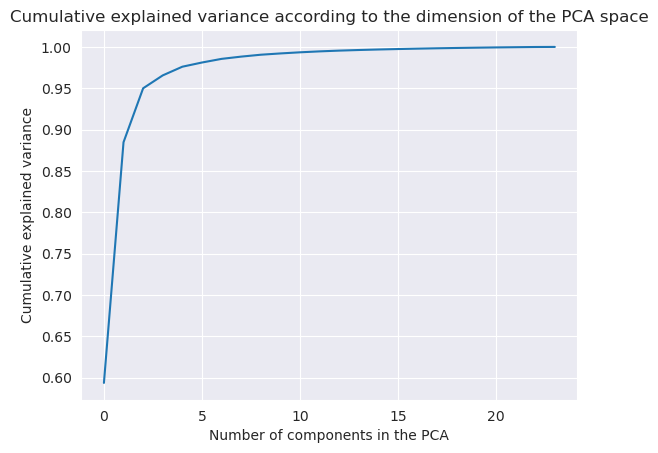

In [36]:
plt.plot(np.cumsum(pca_3.explained_variance_ratio_))

plt.title('Cumulative explained variance according to the dimension of the PCA space')
plt.xlabel('Number of components in the PCA')
plt.ylabel('Cumulative explained variance');


#permet de connaître le nombre de variables à garder pour expliquer 90% de la variance 

#pca = PCA(0.90).fit(loading) 

pca_3 = PCA(0.85).fit(data_heures) #pour savoir directement le nombre de composants nécessaire pour représenter une explication de 85% de la variance
pca_3.n_components_ #on affiche le nb de composants qu'on garde pour la PCA
print(f"on garde {pca_3.n_components_} composants pour le PCA")


In [37]:
pca_3 = PCA(n_components = 2)
data_heures_pca = pca_3.fit_transform(data_heures) #même chose que fit puis transform dans notre cas à nous

print(100*pca_3.explained_variance_ratio_)


print('--- PCA ---')
print('Initial dimension:', data_jours.shape)
print('Dimension after projection:', data_jours_pca.shape)

print('')

print('--- Explained variance ---')
print('Component 1:', round(pca_3.explained_variance_[0],2), 'i.e.', round(100*pca_3.explained_variance_ratio_[0],2), '% of the total variance')
print('Component 2:', round(pca_3.explained_variance_[1],2), 'i.e.', round(100*pca_3.explained_variance_ratio_[1],2), '% of the total variance')


[59.36410223 29.10997042]
--- PCA ---
Initial dimension: (1189, 7)


NameError: name 'data_jours_pca' is not defined

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=[f"PC{i+1}" for i in range(len(pca_3.explained_variance_ratio_))], y=pca_3.explained_variance_ratio_ * 100)
plt.xlabel("Composantes Principales")
plt.ylabel("Pourcentage de Variance Expliquée")
plt.title("Proportion de Variance Expliquée par Chaque Composante Principale")
plt.ylim(0,80)  # limiter l'axe y à la plage spécifiée
plt.show()


In [ ]:
box = plt.boxplot(data_heures_pca[:,:10], patch_artist=True)
plt.setp(box["boxes"], facecolor="coral", alpha=.5)
plt.title("Box plots of the first ten principal components")
plt.tight_layout()
plt.show()

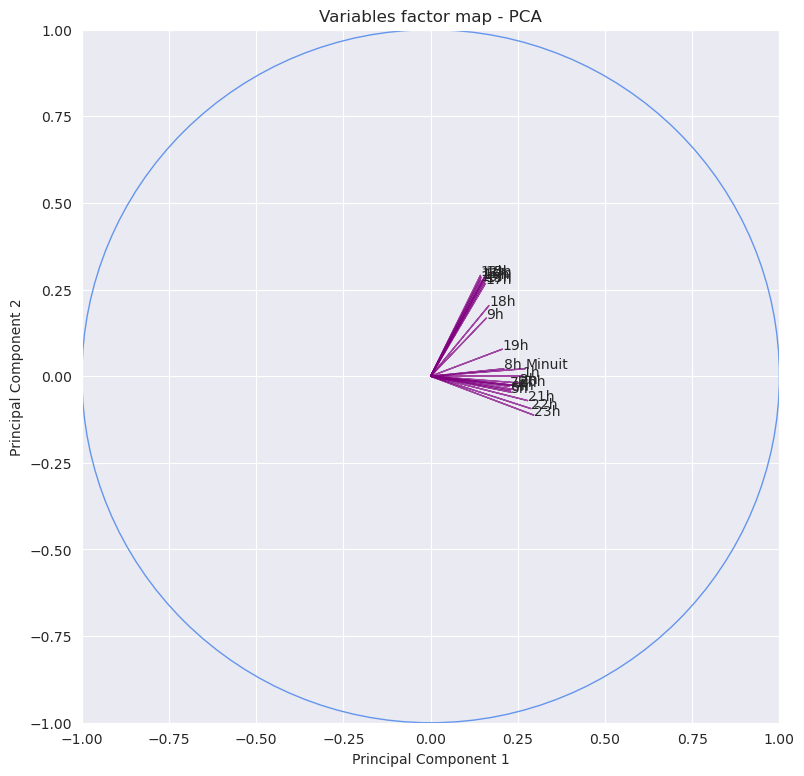

In [38]:
coord1 = pca.components_[0] * np.sqrt(pca_3.explained_variance_[0])
coord2 = pca.components_[1] * np.sqrt(pca_3.explained_variance_[1])

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1, coord2, data_heures.columns):
    plt.text(i, j, nom, fontsize=10)
    plt.arrow(0, 0, i, j, color = 'purple', alpha=0.7, width = 0.0001)

plt.axis((-1, 1, -1, 1))
plt.gcf().gca().add_artist(plt.Circle((0, 0), radius = 1, color = 'cornflowerblue', fill = False))

plt.title('Variables factor map - PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.grid(True)
plt.show()

### Clustering with 𝑘-means

In [39]:
# Cas 1 : jeu de données complet vs ACP sur ensemble des données 

In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import colors


!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Defaulting to user installation because normal site-packages is not writeable


In [41]:
# fonction pour reclasser les clusters dans mat de confusions

In [42]:
def matchClasses(classif1, classif2):
    cm = confusion_matrix(classif1, classif2)
    K = cm.shape[0]
    a, b = np.zeros(K), np.zeros(K)
    for j in range(K):
        for i in range(K):
            if (a[j] < cm[i,j]):
                a[j] = cm[i,j]
                b[j] = i 
    a = a.astype(int)
    b = b.astype(int)
                                             
    print ("")
    print ("Classes size:", a)
    print ("Class (in the classif1 numbering):", b)
    print ("")
    
    table = cm.copy()
    for i in range(K):
        table[:,b[i]] = cm[:,i]   
        
    clusters = classif2.copy()
    n = classif2.shape[0]
    for i in range(n):
        for j in range(K):
            if (classif2[i] == j):
                clusters[i] = b[j]
        
    return table, clusters

We will now try to find the optimal number of clusters

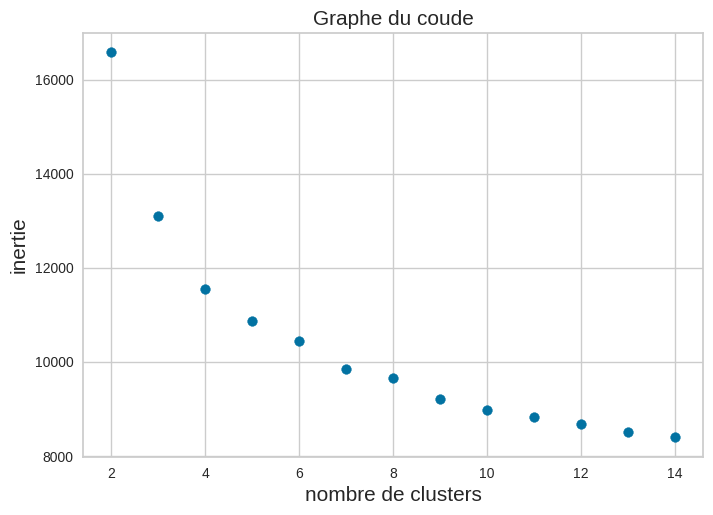

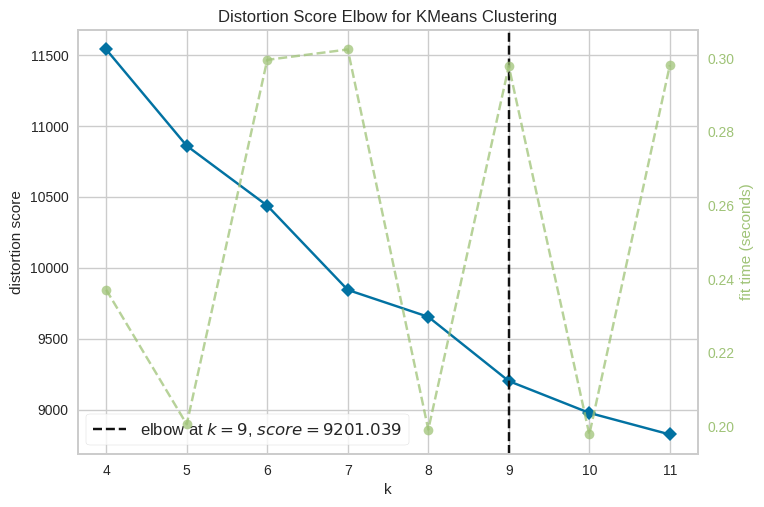

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [43]:
inertia = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto', max_iter=100, random_state=42)
    kmeans.fit(loading)
    inertia.append(kmeans.inertia_)
inertia = np.array(inertia)


plt.scatter(range(2, 15), inertia[1:])
plt.xlabel('nombre de clusters', fontsize = 15)
plt.ylabel('inertie', fontsize = 15)
plt.title("Graphe du coude", fontsize = 15)
plt.show()


# --- #


# Using yellowbrick

kmeans = KMeans(init='k-means++', n_init='auto', max_iter=100, random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(4,12))

visualizer.fit(loading)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

Pour analyser ces graphes, on cherche le coude c'est à dire le moment où lorsqu'on va rajouter une composante il y aura la plus grande baisse d'inertie. Dans le premier graphe, on peut observer une différence de tendance entre 7-9. Pour le deuxième graphe, le coude est à 9.  

Nous allons maintenant utiliser la méthode "silhouette score" pour déterminer le nombre de cluster

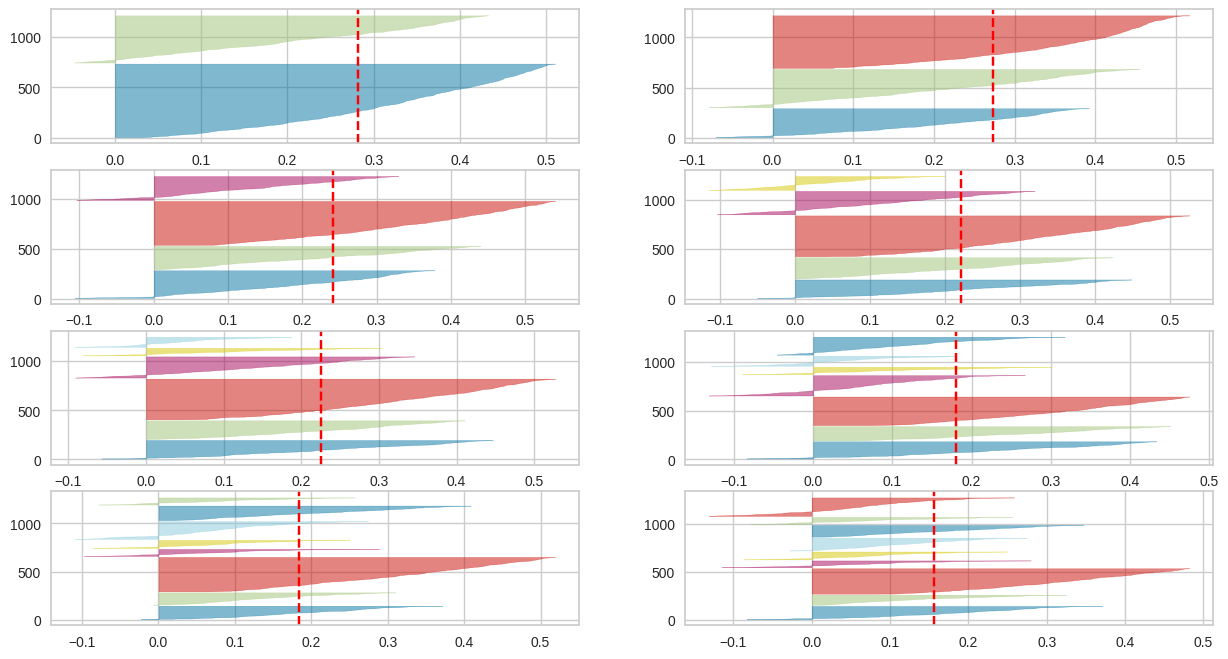

In [44]:
fig, ax = plt.subplots(4, 2, figsize=(15,8))

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto', max_iter=100, random_state=42)
    q, mod = divmod(k, 2) 
    # Create SilhouetteVisualizer instance with KMeans instance
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(loading)

Pour choisir le nombre de clusters le plus adapté il faut trouver un équilibre entre plusieurs aspects. Tout d'abord, il faut que chaque pic dépassent le trait rouge, alors, les données sont adaptées au nombre de classes. Aussi, il faudrait dans l'idéal que chaque pic ait la même épaisseur. Enfin, il faut qu'il y ait le moins de valeurs négatives possibles, elles correspondent au nombre de variables mal classées.
Dans notre cas, il n'y a pas vraiment de situation idéale. Avec 2,3 ou 4 clusters le graphiques est plutôt bien mais il faudrait peut etre plus de clusters pour analyser le grand nombre de données que nous avons. Si on part sur 9 clusters (comme pour le graphe Elbow), le silhoutte score n'est pas parfait mais il est un bon compromis entre les aspects énoncés précedemment.

Ci-dessous on observe l'histogramme des classifications formées avec le nombre de clusters qui nous avons choisi (ici 9). 

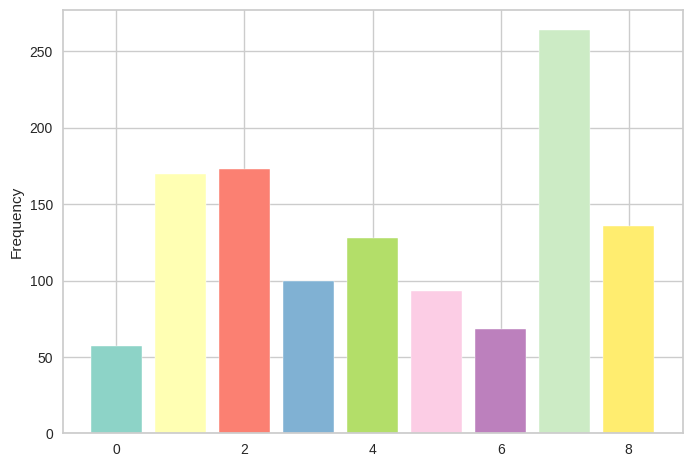

In [45]:
K = 9

kmeans = KMeans(n_clusters=K, init='k-means++', n_init='auto', random_state=0)
clusters = kmeans.fit_predict(loading)

# ----- #

cmap = plt.get_cmap('Set3',K)
plt.bar(*np.unique(clusters, return_counts=True), color=cmap.colors)
plt.ylabel("Frequency")
plt.show()

On constate que les variables sont réparties de manière assez hétérogène. Beaucoup de variables se trouvent dans le cluster 7 et au contraire dans le cluster 0 il n'y en a pas beaucoup. Cependant, le nombre de variables est supérieur à 50 donc la répartition est raisonnable.


In [47]:
# jeu de données réduit avec loading_pca

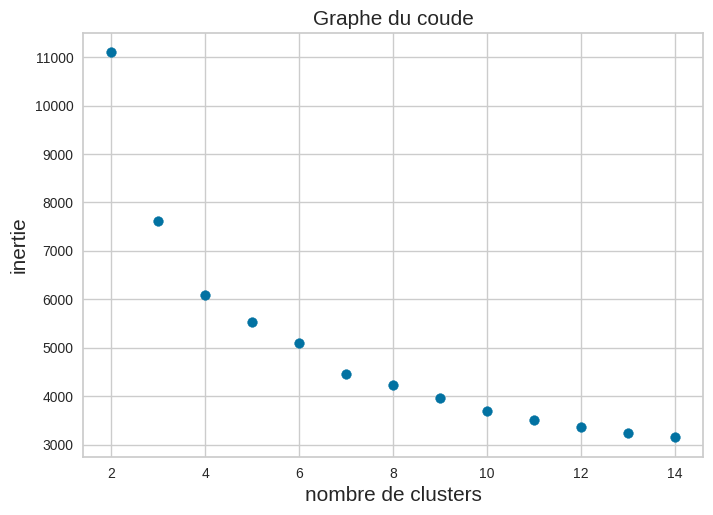

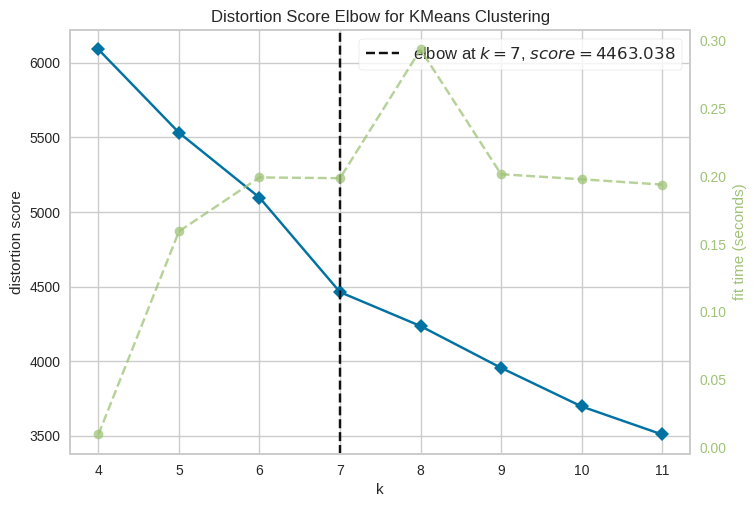

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
inertia = []
for k in range(1, 15):
    kmeans_pca = KMeans(n_clusters=k, init='k-means++', n_init='auto', max_iter=100, random_state=42)
    kmeans_pca.fit(loading_pca)
    inertia.append(kmeans_pca.inertia_)
inertia = np.array(inertia)


plt.scatter(range(2, 15), inertia[1:])
plt.xlabel('nombre de clusters', fontsize = 15)
plt.ylabel('inertie', fontsize = 15)
plt.title("Graphe du coude", fontsize = 15)
plt.show()


# --- #


# Using yellowbrick

kmeans_pca = KMeans(init='k-means++', n_init='auto', max_iter=100, random_state=42)
visualizer = KElbowVisualizer(kmeans_pca, k=(4,12))

visualizer.fit(loading_pca)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

D'après la méthode du coude on peut dire que le nombre de clusters le plus adapté avec K-means estt de 7

Nous allons utiliser la méthode "silouhette score" pour valider le résultat précedent

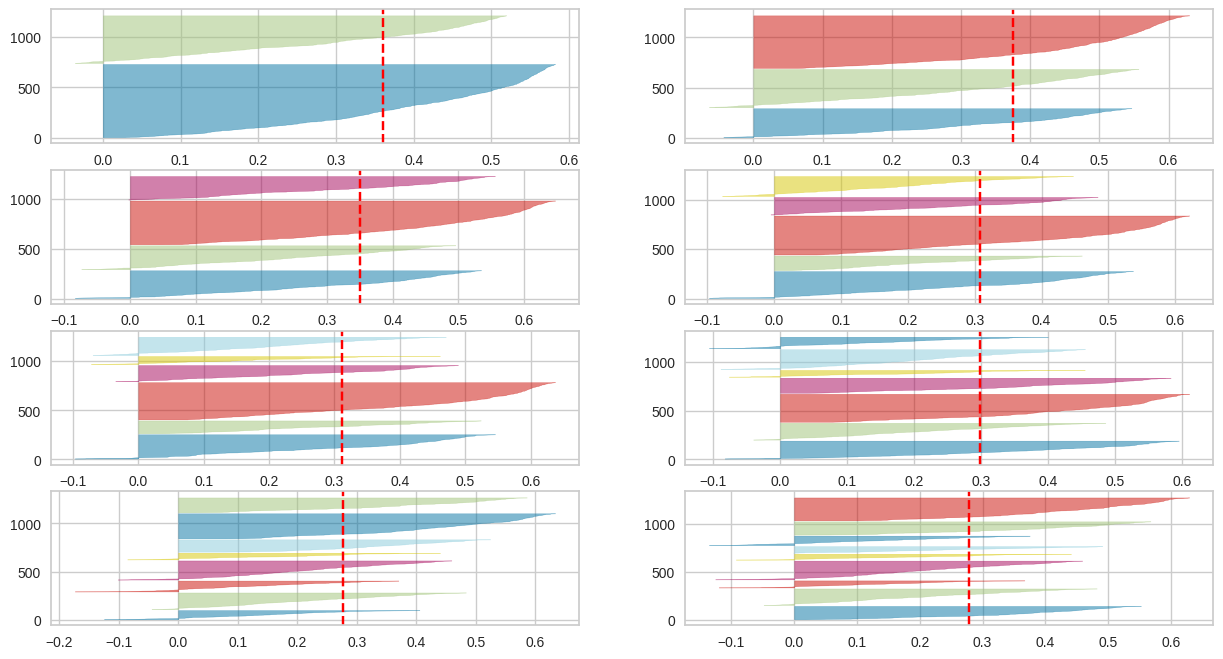

In [49]:
fig, ax = plt.subplots(4, 2, figsize=(15,8))

for k in range(2, 10):
    kmeans_pca = KMeans(n_clusters=k, init='k-means++', n_init='auto', max_iter=100, random_state=42)
    q, mod = divmod(k, 2) 
    # Create SilhouetteVisualizer instance with KMeans instance
    visualizer = SilhouetteVisualizer(kmeans_pca, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(loading_pca)

Si on choisit un nombre de clusters égal à 7, voici l'histogramme des données associé

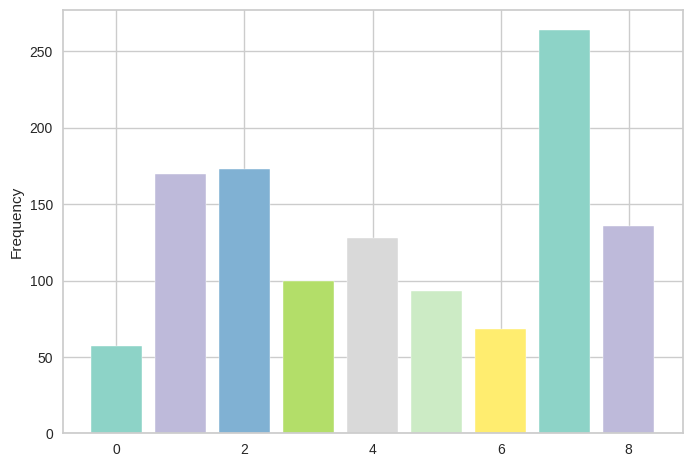

In [50]:
K = 7

kmeans_pca = KMeans(n_clusters=K, init='k-means++', n_init='auto', random_state=0)
clusters_pca = kmeans_pca.fit_predict(loading_pca)

# ----- #

cmap = plt.get_cmap('Set3',K)
plt.bar(*np.unique(clusters, return_counts=True), color=cmap.colors)
plt.ylabel("Frequency")
plt.show()

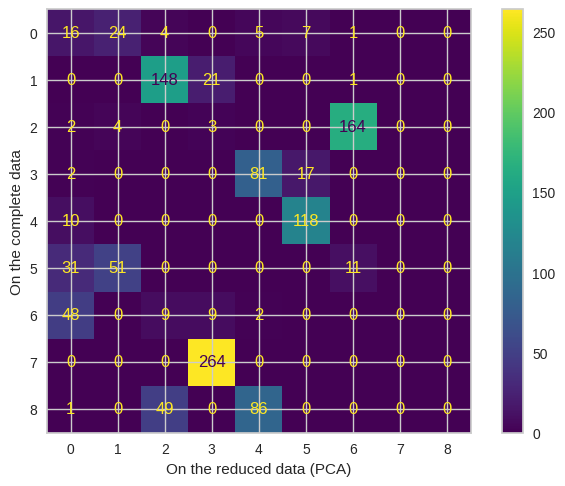

In [51]:
ConfusionMatrixDisplay(confusion_matrix(clusters, clusters_pca)).plot()
plt.xlabel('On the reduced data (PCA)')
plt.ylabel('On the complete data')
plt.show()

In [52]:
# reclassement des clusters


Classes size: [ 48  51 148 264  86 118 164   0   0]
Class (in the classif1 numbering): [6 5 1 7 8 4 2 0 0]



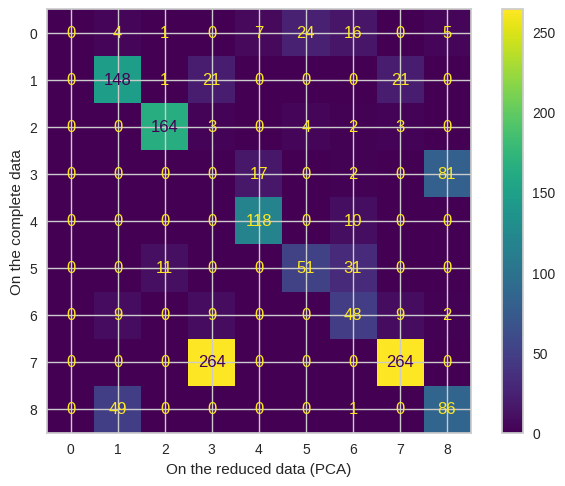

In [53]:
cm, clusters_pca_sorted = matchClasses(clusters, clusters_pca)

ConfusionMatrixDisplay(cm).plot()
plt.xlabel('On the reduced data (PCA)')
plt.ylabel('On the complete data')
plt.show()

Comparaison des deux classifications :

In [61]:
#on recupère la table de contingence issue de la matrice de confusion : 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm, clusters_pca_sorted = matchClasses(clusters, clusters_pca)

# Créer la table de contingence
K = len(np.unique(clusters))  # Nombre de clusters dans vos données originales
contingency_table = np.zeros((K, K), dtype=int)

# Remplir la table de contingence en utilisant la matrice de confusion
for i in range(K):
    for j in range(K):
        contingency_table[i, j] = cm[i, j]

print("Table de contingence :")
print(contingency_table)



Classes size: [ 48  51 148 264  86 118 164   0   0]
Class (in the classif1 numbering): [6 5 1 7 8 4 2 0 0]

Table de contingence :
[[  0   4   1   0   7  24  16   0   5]
 [  0 148   1  21   0   0   0  21   0]
 [  0   0 164   3   0   4   2   3   0]
 [  0   0   0   0  17   0   2   0  81]
 [  0   0   0   0 118   0  10   0   0]
 [  0   0  11   0   0  51  31   0   0]
 [  0   9   0   9   0   0  48   9   2]
 [  0   0   0 264   0   0   0 264   0]
 [  0  49   0   0   0   0   1   0  86]]


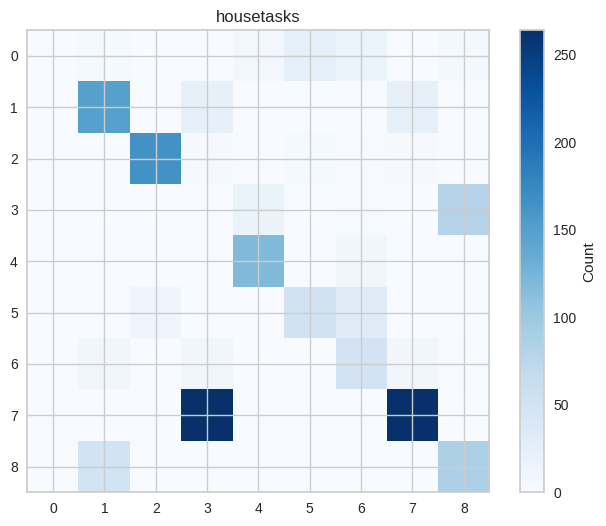

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Balloon plot
plt.figure(figsize=(8, 6))
plt.imshow(contingency_table, cmap='Blues', interpolation='nearest')
plt.title("housetasks")
plt.xlabel("")
plt.ylabel("")
plt.colorbar(label='Count')
plt.show()

#cela permet de comprendre un peu mieux le lien entre les groupes créés sur les données completes et ceux des données reduites

On va réaliser une Analyse en correspondance (CA), pour cela on utilise la bibliothèque "prince".
On doit également convertir notre table de contingence en dataframe pour pouvoir l'utiliser dans les fonctions.

In [98]:
from prince import CA

#Création d'un dataframe issue de la table de contigence afin d'appliquer la CA

data_contingency = pd.DataFrame(contingency_table)

#on renomme les colonnes et les lines de notre dataframe afin de les lier aux groupes auxquels
#ils font référence
for i in range(9):
    data_contingency.rename(columns={i: 'groupe' + str(i)}, inplace=True)
    data_contingency.rename(index={i: 'groupe_pca' + str(i)}, inplace=True)


print(data_contingency)

#nan_values = data_contingency.isnull()
#inf_values = np.isinf(data_contingency)

# Affichage des valeurs infinies
#print(nan_values)
#print(inf_values)
#print(data_contingency.dtypes)

# Création de l'objet CA
ca = CA()

# Ajustement de l'ACM aux données
ca.fit(data_contingency)

# Affichage des résultats
#print(ca)


             groupe0  groupe1  groupe2  groupe3  groupe4  groupe5  groupe6  \
groupe_pca0        0        4        1        0        7       24       16   
groupe_pca1        0      148        1       21        0        0        0   
groupe_pca2        0        0      164        3        0        4        2   
groupe_pca3        0        0        0        0       17        0        2   
groupe_pca4        0        0        0        0      118        0       10   
groupe_pca5        0        0       11        0        0       51       31   
groupe_pca6        0        9        0        9        0        0       48   
groupe_pca7        0        0        0      264        0        0        0   
groupe_pca8        0       49        0        0        0        0        1   

             groupe7  groupe8  
groupe_pca0        0        5  
groupe_pca1       21        0  
groupe_pca2        3        0  
groupe_pca3        0       81  
groupe_pca4        0        0  
groupe_pca5        0       

/home/leletty/.local/lib/python3.11/site-packages/prince/ca.py:83: RuntimeWarning: divide by zero encountered in power
  S = sparse.diags(r**-0.5) @ (X - np.outer(r, c)) @ sparse.diags(c**-0.5)


ValueError: array must not contain infs or NaNs

In [74]:
# on affiche ensuite les différente valeurs propres afin de voir le pourcentage expliqué par chacune 
# d'entre elles et de choisir la dimension de notre CA

display(ca.eigenvalues_summary)

ca.scree_plot()

NotFittedError: This CA instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
#Création d'un biplot afin d'afficher les résultats de notre CA:
fig, ax = plt.subplots()
ca.biplot(ax=ax, show_row_labels=False)
plt.show()

In [ ]:
#regardons maitenant la qualité de la représentation, c'est à dire quelle dimension représente mieux quel groupe

In [ ]:
#on affiche les cosinus pour voir le niveau de la qualité
cos2_rows = ca.row_cosine_squared_
print(cos2_rows)

In [ ]:
#code issu du tp de la MCA : 
#ex : premier ind bien rep par la composante 2
quality_row = ca.row_cosine_similarities(titanic_quali).head(2).style.format('{:.3}')
display(quality_row)


quality_column = ca.column_cosine_similarities(titanic_quali).style.format('{:.3}')
display(quality_column.background_gradient())

Ce code identifie la tâche la mieux et la moins bien représentée dans le plan de l'AC, calcule la qualité de représentation pour chaque tâche et affiche un graphique des coordonnées des lignes avec une coloration basée sur la qualité de représentation :

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import ScalarMappable

# Créer l'objet CA et ajuster aux données
ca = CA()
ca.fit(data_contingency)

# Accéder aux carrés des cosinus pour les lignes
cos2_rows = ca.row_cosine_squared_

# Identifier l'indice de la tâche la mieux représentée
idx_best = np.argmax(np.sum(cos2_rows[:, [0, 1]], axis=1))
print("In the CA plan, the", data_contingency.index[idx_best], "task is the best represented")

# Identifier l'indice de la tâche la moins bien représentée
idx_worst = np.argmin(np.sum(cos2_rows[:, [0, 1]], axis=1))
print("In the CA plan, the", data_contingency.index[idx_worst], "task is the worst represented")

# Calculer la qualité de représentation
quality = pd.DataFrame(np.sum(cos2_rows[:, [0, 1]], axis=1), columns=["Representation"], index=data_contingency.index)

# Afficher la qualité de représentation
print(quality)

# Créer un colormap pour représenter la qualité sur le graphique
cmap = LinearSegmentedColormap.from_list("", ["blue", "yellow", "red"])
sm = ScalarMappable(cmap=cmap)
sm.set_array([])

# Afficher le graphique avec les couleurs basées sur la qualité de représentation
plt.figure(figsize=(10, 8))
plt.scatter(ca.row_coordinates_[:, 0], ca.row_coordinates_[:, 1], c=quality["Representation"], cmap=cmap)
plt.colorbar(sm, label="Representation quality")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("CA plot with quality representation")
plt.show()


In [ ]:
#autre type de représentation dans le plan :

In [ ]:
cos2_cols = ca.column_cosine_squared_

# Identifier l'indice de la variable la mieux représentée
idx_best = np.argmax(np.sum(cos2_cols[:, [0, 1]], axis=1))
print("In the CA plan,", data_contingency.columns[idx_best], "is the best represented")

# Identifier l'indice de la variable la moins bien représentée
idx_worst = np.argmin(np.sum(cos2_cols[:, [0, 1]], axis=1))
print("In the CA plan,", data_contingency.columns[idx_worst], "is the worst represented")

# Calculer la qualité de représentation
quality = pd.DataFrame(np.sum(cos2_cols[:, [0, 1]], axis=1), columns=["Representation"], index=data_contingency.columns)

# Afficher la qualité de représentation
print(quality)

# Créer un colormap pour représenter la qualité sur le graphique
cmap = LinearSegmentedColormap.from_list("", ["blue", "yellow", "red"])
sm = ScalarMappable(cmap=cmap)
sm.set_array([])

# Afficher le graphique avec les couleurs basées sur la qualité de représentation
plt.figure(figsize=(10, 8))
plt.scatter(ca.column_coordinates_[:, 0], ca.column_coordinates_[:, 1], c=quality["Representation"], cmap=cmap)
plt.colorbar(sm, label="Representation quality")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("CA plot with quality representation")
plt.show()

In [ ]:
#regardons la contribution : 

contrib_rows = ca.row_contrib_

# Afficher les contributions des lignes
print(contrib_rows)

# Supposons que vous voulez identifier la tâche contribuant le plus à la dimension 2
i = 1  # Indice de la dimension (0-indexé)
idx = np.argmax(contrib_rows[:, i])

# Afficher la tâche qui contribue le plus à la dimension spécifiée
print("The", data_contingency.index[idx], "task contributes most to dimension", i+1)



contrib = ca.column_contributions_.style.format('{:.1%}')
display(contrib.highlight_max(color='orange').highlight_min(color='lightblue'))

In [ ]:
#on affiche la contributions de la dimension à chaque groupe
plt.figure(figsize=(10, 6))
ca.plot_row_contributions(axes=[1], top=10)
plt.title("Contributions of rows to dimension 2")
plt.show()

# Contributions des lignes à la dimension 3
plt.figure(figsize=(10, 6))
ca.plot_row_contributions(axes=[2], top=10)
plt.title("Contributions of rows to dimension 3")
plt.show()

# Contributions totales aux dimensions 1 et 2
plt.figure(figsize=(10, 6))
ca.plot_row_contributions(axes=[0, 1], top=10)
plt.title("Total contribution to dimensions 1 and 2")
plt.show()

In [ ]:
#et la on l'affiche sous forme de tableau : 

# + le score est proche de 1 plus la contribution est forte
contrib = ca.column_contributions_.style.format('{:.1%}')
display(contrib.highlight_max(color='orange').highlight_min(color='lightblue'))

In [ ]:
cmap = LinearSegmentedColormap.from_list("", ["blue", "yellow", "red"])
sm = ScalarMappable(cmap=cmap)
sm.set_array([])

# Afficher le nuage de points avec les contributions des lignes
plt.figure(figsize=(10, 8))
plt.scatter(ca.row_coordinates_[:, 0], ca.row_coordinates_[:, 1], c=ca.row_contrib_.iloc[:, 0], cmap=cmap)
plt.colorbar(sm, label="Row contribution")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Row contributions plot")
plt.show()

In [ ]:
import numpy as np

# Supposons que vous voulez imprimer le nom de la tâche la mieux représentée par l'axe 1
i = 0  # Indice de l'axe (0-indexé)
idx = np.argmax(cos2_rows[:, i])

# Afficher le nom de la tâche
print("The", data_contingency.index[idx], "task is best represented by axis", i+1)


In [ ]:
# visualisation des clusters grace à scatterplot

In [ ]:
points_diff = clusters != clusters_pca

fig, axs = plt.subplots(1, 3, figsize = (15, 5))

#graphe 1 : données complètes
im1 = axs[0].scatter(coord.latitude, coord.longitude, c = clusters, cmap = 'viridis', s=20)
axs[0].set_title('Données complètes', fontsize = 10)

#graphe 2 : données réduites au pca
im2 = axs[1].scatter(coord.latitude, coord.longitude, c = clusters_pca, cmap = 'viridis', s=20)
axs[1].set_title('Données réduites au pca', fontsize = 10)

#graphe 3 : superposition des résultats avec affichage en noir des points différents
im3 = axs[2].scatter(coord.latitude, coord.longitude, c=clusters, cmap='viridis', s=20, label='Données réduites au PCA')
axs[2].set_title('Superposition', fontsize=10)

# Superposition des points différents en noir sur le deuxième scatterplot
axs[2].scatter(coord.latitude[points_diff], coord.longitude[points_diff], color='black', s=20, alpha=0.4, label='Différences')

# Calcul du nombre de points différents
num_diff_points = np.sum(points_diff)

# Calcul du pourcentage de réussite
pourcentage_reussite = (1- num_diff_points / len(clusters)) * 100

# Affichage du résultat
print(f"Nombre de points différents : {num_diff_points} sur {len(clusters)}")
print(f"Pourcentage de réussite : {pourcentage_reussite:.2f}%")

In [ ]:
#cas 2 : jeu de données regroupé par jour VS ACP associée

In [ ]:
inertia = []
for k in range(1, 15):
    kmeans_jours = KMeans(n_clusters=k, init='k-means++', n_init='auto', max_iter=100, random_state=42)
    kmeans_jours.fit(data_jours)
    inertia.append(kmeans_jours.inertia_)
inertia = np.array(inertia)


plt.scatter(range(2, 15), inertia[1:])
plt.xlabel('nombre de clusters', fontsize = 15)
plt.ylabel('inertie', fontsize = 15)
plt.title("Graphe du coude", fontsize = 15)
plt.show()


# --- #


# Using yellowbrick

kmeans_jours = KMeans(init='k-means++', n_init='auto', max_iter=100, random_state=42)
visualizer = KElbowVisualizer(kmeans_jours, k=(4,12))

visualizer.fit(data_jours)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(15,8))

for k in range(2, 10):
    kmeans_jours = KMeans(n_clusters=k, init='k-means++', n_init='auto', max_iter=100, random_state=42)
    q, mod = divmod(k, 2) 
    # Create SilhouetteVisualizer instance with KMeans instance
    visualizer = SilhouetteVisualizer(kmeans_jours, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_jours)

In [ ]:
K = 7

kmeans_jours = KMeans(n_clusters=K, init='k-means++', n_init='auto', random_state=0)
clusters_jours = kmeans_jours.fit_predict(data_jours)

# ----- #

cmap = plt.get_cmap('Set3',K)
plt.bar(*np.unique(clusters, return_counts=True), color=cmap.colors)
plt.ylabel("Frequency")
plt.show()

In [ ]:
# jeu de données réduit avec data_jours_pca 

In [ ]:
inertia = []
for k in range(1, 15):
    kmeans_PCA_jours = KMeans(n_clusters=k, init='k-means++', n_init='auto', max_iter=100, random_state=42)
    kmeans_PCA_jours.fit(data_jours_pca )
    inertia.append(kmeans_PCA_jours.inertia_)
inertia = np.array(inertia)


plt.scatter(range(2, 15), inertia[1:])
plt.xlabel('nombre de clusters', fontsize = 15)
plt.ylabel('inertie', fontsize = 15)
plt.title("Graphe du coude", fontsize = 15)
plt.show()


# --- #


# Using yellowbrick

kmeans_PCA_jours = KMeans(init='k-means++', n_init='auto', max_iter=100, random_state=42)
visualizer = KElbowVisualizer(kmeans_PCA_jours, k=(4,12))

visualizer.fit(data_jours_pca )    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(15,8))

for k in range(2, 10):
    kmeans_PCA_jours = KMeans(n_clusters=k, init='k-means++', n_init='auto', max_iter=100, random_state=42)
    q, mod = divmod(k, 2) 
    # Create SilhouetteVisualizer instance with KMeans instance
    visualizer = SilhouetteVisualizer(kmeans_PCA_jours, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_jours_pca )

In [ ]:
K = 6

kmeans_PCA_jours = KMeans(n_clusters=K, init='k-means++', n_init='auto', random_state=0)
clusters_jours_pca = kmeans_PCA_jours.fit_predict(data_jours_pca )

# ----- #

cmap = plt.get_cmap('Set3',K)
plt.bar(*np.unique(clusters, return_counts=True), color=cmap.colors)
plt.ylabel("Frequency")
plt.show()

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(clusters_jours, clusters_jours_pca)).plot()
plt.xlabel('On the reduced data (PCA)')
plt.ylabel('On the complete data')
plt.show()

In [ ]:
# reclassement des clusters

In [ ]:
cm, clusters_pca_sorted = matchClasses(clusters_jours, clusters_jours_pca)

ConfusionMatrixDisplay(cm).plot()
plt.xlabel('On the reduced data (PCA)')
plt.ylabel('On the complete data')
plt.show()

In [ ]:
# visualisation des clusters grace à scatterplot

In [ ]:
points_diff2 = clusters_jours != clusters_jours_pca

fig, axs = plt.subplots(1, 3, figsize = (15, 5))

#graphe 1 : données_jours complètes
im1 = axs[0].scatter(coord.latitude, coord.longitude, c = clusters_jours , cmap = 'viridis', s=20)
axs[0].set_title('Données_jours complètes', fontsize = 10)

#graphe 2 : données_jours réduites au pca
im2 = axs[1].scatter(coord.latitude, coord.longitude, c = clusters_jours_pca, cmap = 'viridis', s=20)
axs[1].set_title('Données_jours réduites au pca', fontsize = 10)

#graphe 3 : superposition des résultats avec affichage en noir des points différents
im3 = axs[2].scatter(coord.latitude, coord.longitude, c=clusters_jours, cmap='viridis', s=20, label='Données réduites au PCA')
axs[2].set_title('Superposition', fontsize=10)

# Superposition des points différents en noir sur le deuxième scatterplot
axs[2].scatter(coord.latitude[points_diff2], coord.longitude[points_diff2], color='black', s=20, alpha=0.4, label='Différences')

# Calcul du nombre de points différents
num_diff_points2 = np.sum(points_diff2)

# Calcul du pourcentage de réussite
pourcentage_reussite2 = (1- num_diff_points2 / len(clusters_jours)) * 100

# Affichage du résultat
print(f"Nombre de points différents : {num_diff_points2} sur {len(clusters_jours)}")
print(f"Pourcentage de réussite : {pourcentage_reussite2:.2f}%")

In [ ]:
# cas 3 : jeu de données regroupé par heure vs son ACP associé

In [ ]:
inertia = []
for k in range(1, 15):
    kmeans_heures = KMeans(n_clusters=k, init='k-means++', n_init='auto', max_iter=100, random_state=42)
    kmeans_heures.fit(data_heures )
    inertia.append(kmeans_heures.inertia_)
inertia = np.array(inertia)


plt.scatter(range(2, 15), inertia[1:])
plt.xlabel('nombre de clusters', fontsize = 15)
plt.ylabel('inertie', fontsize = 15)
plt.title("Graphe du coude", fontsize = 15)
plt.show()


# --- #


# Using yellowbrick

kmeans_heures = KMeans(init='k-means++', n_init='auto', max_iter=100, random_state=42)
visualizer = KElbowVisualizer(kmeans_heures, k=(4,12))

visualizer.fit(data_heures )    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(15,8))

for k in range(2, 10):
    kmeans_heures = KMeans(n_clusters=k, init='k-means++', n_init='auto', max_iter=100, random_state=42)
    q, mod = divmod(k, 2) 
    # Create SilhouetteVisualizer instance with KMeans instance
    visualizer = SilhouetteVisualizer(kmeans_heures, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_heures )

In [ ]:
K = 6

kmeans_heures = KMeans(n_clusters=K, init='k-means++', n_init='auto', random_state=0)
clusters_heures = kmeans_heures.fit_predict(data_heures )

# ----- #

cmap = plt.get_cmap('Set3',K)
plt.bar(*np.unique(clusters, return_counts=True), color=cmap.colors)
plt.ylabel("Frequency")
plt.show()

In [ ]:
# jeu de données réduit avec data_heures_pca

In [ ]:
inertia = []
for k in range(1, 15):
    kmeans_PCA_heures = KMeans(n_clusters=k, init='k-means++', n_init='auto', max_iter=100, random_state=42)
    kmeans_PCA_heures.fit(data_heures_pca )
    inertia.append(kmeans_PCA_heures.inertia_)
inertia = np.array(inertia)


plt.scatter(range(2, 15), inertia[1:])
plt.xlabel('nombre de clusters', fontsize = 15)
plt.ylabel('inertie', fontsize = 15)
plt.title("Graphe du coude", fontsize = 15)
plt.show()


# --- #


# Using yellowbrick

kmeans_PCA_heures = KMeans(init='k-means++', n_init='auto', max_iter=100, random_state=42)
visualizer = KElbowVisualizer(kmeans_PCA_heures, k=(4,12))

visualizer.fit(data_heures_pca)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(15,8))

for k in range(2, 10):
    kmeans_PCA_heures = KMeans(n_clusters=k, init='k-means++', n_init='auto', max_iter=100, random_state=42)
    q, mod = divmod(k, 2) 
    # Create SilhouetteVisualizer instance with KMeans instance
    visualizer = SilhouetteVisualizer(kmeans_PCA_heures, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_heures_pca )

In [ ]:
K = 6

kmeans_PCA_heures = KMeans(n_clusters=K, init='k-means++', n_init='auto', random_state=0)
clusters_heures_pca = kmeans_PCA_heures.fit_predict(data_heures_pca )

# ----- #

cmap = plt.get_cmap('Set3',K)
plt.bar(*np.unique(clusters, return_counts=True), color=cmap.colors)
plt.ylabel("Frequency")
plt.show()

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(clusters_heures, clusters_heures_pca)).plot()
plt.xlabel('On the reduced data (PCA)')
plt.ylabel('On the complete data')
plt.show()

In [ ]:
# reclassement des clusters

In [ ]:
cm, clusters_pca_sorted = matchClasses(clusters_heures, clusters_heures_pca)

ConfusionMatrixDisplay(cm).plot()
plt.xlabel('On the reduced data (PCA)')
plt.ylabel('On the complete data')
plt.show()

In [ ]:
# visualisation des clusters grace à scatterplot

In [ ]:
points_diff3 = clusters_heures != clusters_heures_pca

fig, axs = plt.subplots(1, 3, figsize = (15, 5))

#graphe 1 : données_jours complètes
im1 = axs[0].scatter(coord.latitude, coord.longitude, c = clusters_heures , cmap = 'viridis', s=20)
axs[0].set_title('Données_jours complètes', fontsize = 10)

#graphe 2 : données_jours réduites au pca
im2 = axs[1].scatter(coord.latitude, coord.longitude, c = clusters_heures_pca, cmap = 'viridis', s=20)
axs[1].set_title('Données_jours réduites au pca', fontsize = 10)

#graphe 3 : superposition des résultats avec affichage en noir des points différents
im3 = axs[2].scatter(coord.latitude, coord.longitude, c=clusters_heures, cmap='viridis', s=20, label='Données réduites au PCA')
axs[2].set_title('Superposition', fontsize=10)

# Superposition des points différents en noir sur le deuxième scatterplot
axs[2].scatter(coord.latitude[points_diff3], coord.longitude[points_diff3], color='black', alpha=0.4, s=20, label='Différences')

# Calcul du nombre de points différents
num_diff_points3 = np.sum(points_diff3)

# Calcul du pourcentage de réussite
pourcentage_reussite3 = (1- num_diff_points3 / len(clusters_heures)) * 100

# Affichage du résultat
print(f"Nombre de points différents : {num_diff_points3} sur {len(clusters_heures)}")
print(f"Pourcentage de réussite : {pourcentage_reussite3:.2f}%")

### Agglomerative Clustering


On étudie ici différentes techniques de classification. On commence par la méthode de la classification ascendante hiérarchique (CAH). Cette méthode consiste à afficher des dendrogrammes des différente données en fonction de différents likages.

In [ ]:
#CAS 1 : jeu de données complet 

In [ ]:
!pip install yellowbrick

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

La méthode CAH étant très coûteuse en termes de calculs, on préférera commençait l'analyse en prenant un échantillon plus petit (A voir : si k-means sur le pca est similaire à la data entière on prend le pca sinon on prend juste une donnée sur 5)

In [ ]:
loading_reduced = loading_standardise[::5]

#on peut aussi le réduire autrement :
#Si le jeu de données de PCA obtient de bons résultats sur la comparaion k-means jeu de données entier et pca aors :
#on peut prendre l'ensemble PCA ie réduite en colonne puis en prendre toutes les 3 lignes 

print("mars data full sample size:", loading.shape)
print("mars data sub-sample size :", loading_reduced.shape)

On détermine le nombre de clusters à partir de la méthode du coude

In [ ]:
ac = AgglomerativeClustering(linkage="ward", compute_distances=True)
clusters_ac = ac.fit_predict(loading_reduced)

distances = ac.distances_

n_sizes = 15
x = np.arange(n_sizes, 0, -1)
y = ac.distances_[-n_sizes:]

plt.scatter(x, y)

plt.xlabel('Point indices')
plt.ylabel('Distances')
plt.title("Choice of the number of classes")
plt.show()

Autre méthode de caractérisation du nombre de classes:

In [ ]:
ac = AgglomerativeClustering(linkage='ward', compute_distances=True)
visualizer = KElbowVisualizer(ac, k=(4,12))

visualizer.fit(loading_reduced)  # Fit the data to the visualizer
visualizer.show()   
plt.show()

Selon les différents indicateurs il nous faut prendre 7 clusters différents. On affiche alors le dendrogramme associé en utilisant les linkages "Ward".

In [ ]:
#Nombre de clusters choisi par les indicateurs 
K = 7

ac = AgglomerativeClustering(n_clusters=K, compute_distances=True, linkage='ward')
clusters = ac.fit(loading_reduced)

children = ac.children_
distances = ac.distances_
n_observations = np.arange(2, children.shape[0]+2)
linkage_matrix = np.c_[children, distances, n_observations]

sch.dendrogram(linkage_matrix, labels=ac.labels_)

# Cutting the dendrogram to get K classes
max_d = .5*(ac.distances_[-K]+ac.distances_[-K+1])
plt.axhline(y=max_d, c='k')

plt.title("Dendrogram with Ward linkage")
plt.show()

On affiche tous les types de linkages que l'on a étudié pour montrer que "Ward" et "complete" sont les deux types dont les graphes sont faciles à explorer:

In [ ]:
#par soucis de rapidité on prend encore un échantillon plus réduit 
loading_reduced2 = loading_standardise[::15]

print("mars data full sample size:", loading.shape)
print("mars data sub-sample size :", loading_reduced2.shape)

In [ ]:
plt.subplot(2,2,1)
linkage_matrix_single = sch.linkage(loading_reduced2, method='single')
sch.dendrogram(linkage_matrix_single)
plt.title("Dendrogram with single linkage")

plt.subplot(2,2,2)
linkage_matrix_complete = sch.linkage(loading_reduced2, method='complete')
sch.dendrogram(linkage_matrix_complete)
plt.title("Dendrogram with complete linkage")

plt.subplot(2,2,3)
linkage_matrix_average = sch.linkage(loading_reduced2, method='average')
sch.dendrogram(linkage_matrix_average)
plt.title("Dendrogram with average linkage")

plt.subplot(2,2,4)
linkage_matrix_ward = sch.linkage(loading_reduced2, method='ward')
sch.dendrogram(linkage_matrix_ward)
plt.title("Dendrogram with Ward linkage")

plt.tight_layout()
plt.show()

On réalise maintenant la comparaison entre les deux jeux de données :

In [ ]:
"""
from sklearn.metrics import confusion_matrix

ac_all_data = AgglomerativeClustering(n_clusters=K, compute_distances=True, linkage='ward')
clusters_all_data = ac_all_data.fit_predict(loading_standardise)
print(clusters_all_data.shape)


ac_pca_data = AgglomerativeClustering(n_clusters=K, compute_distances=True, linkage='ward')
clusters_pca_data = ac_pca_data.fit_predict(loading_reduced)
print(clusters_pca_data.shape)

loading_reduced_adjusted = loading_reduced[:len(clusters_all_data)]

confusion_matrix_result = confusion_matrix(clusters_all_data, clusters_pca_data)

ConfusionMatrixDisplay(confusion_matrix_result).plot()

"""

#le pb ici c'est qu'on fait le CAH sur un échantillon plus petit pour facilité les calculs de dendrogrammes 
#cpdt ca pose pb quand on veut calculer la matrice de confusion car les échantillons ne sont pas de meme taille logique car on a pris un jeu de données de taille réduite pour rendre les calculs des arbres + rapide

On obtient alors une matrice de confusion, dont on va se servir comme table de contingence pour faire une Analyse en Correspondance.

In [ ]:
""" 
contingency_table = np.zeros((K, K), dtype=int)
for i in range(len(clusters_all_data)):
    contingency_table[clusters_all_data[i], clusters_pca_data[i]] += 1

print("Table de contingence :")
print(contingency_table)

"""

## Gaussian Mixture Models

On affiche d'abord la dispersion des points par cluster initiée par le modèle de mélange gaussien (GMM)

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score 

In [ ]:
K = 7
cmap = plt.get_cmap('Set3', K)

gmm = GaussianMixture(n_components=K, n_init=3)
clusters_gmm = gmm.fit_predict(loading)

# --- #

plt.subplot(1,2,1)
plt.scatter(loading.iloc[:,0], loading.iloc[:,1], c=clusters_gmm, s=1, linewidths=1, cmap=cmap)
plt.grid(True)


plt.tight_layout()
plt.show()

Critère du BIC : 

In [ ]:
k_max = 15

bic = []
for k in range(2, k_max):
    gmm = GaussianMixture(n_components=k, init_params='kmeans', n_init=3)
    gmm.fit(loading)
    bic.append(gmm.bic(loading))
bic = np.array(bic)

plt.scatter(range(2, k_max), bic)
plt.show()


En appliquant le critère BIC sur l'ensemble des donnée, on voit ici que pour minimiser le BIC il faudrait prendre 2 variables 

In [ ]:
k_max = 15

bic = []
for k in range(2, k_max):
    gmm = GaussianMixture(n_components=k, init_params='kmeans', n_init=3)
    gmm.fit(loading_reduced)
    bic.append(gmm.bic(loading_reduced))
bic = np.array(bic)

plt.scatter(range(2, k_max), bic)
plt.show()

En appliquant le même critère sur le jeu de données reduit par la PCA, on a un résultat différent car on garde ici 3 variables au lieu de 2.

## Comparaison des méthodes de classification

In [ ]:
from scipy.spatial.distance import cdist
from matplotlib.patches import Ellipse

In [ ]:
def plotKmeans(kmeans, data, n_clusters=6):
    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radius = [cdist(data[clusters_kmeans == i], [center]).max() for i, center in enumerate(centers)]
    for i in range(n_clusters):
        ax.add_patch(plt.Circle(centers[i], radius[i], fc=cmap.colors[i], alpha=0.3))

In [ ]:
# Importation des bibliothèques nécessaires
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Définition du nombre de clusters
K = 7

# Création de l'objet KMeans
kmeans = KMeans(n_clusters=K)

# Ajustement du modèle KMeans aux données
kmeans.fit(loading_reduced)

# Appel de la fonction plotKmeans
plotKmeans(kmeans, loading_reduced)


In [ ]:
K = 7

kmeans = KMeans(n_clusters=K)

plotKmeans(kmeans, loading_reduced)

In [ ]:
#Cas 2 : jeu de données sur les jours 
loading_reduced = loading[::5]

#on peut aussi le réduire autrement :
#Si le jeu de données de PCA obtient de bons résultats sur la comparaion k-means jeu de données entier et pca aors :
#on peut prendre l'ensemble PCA ie réduite en colonne puis en prendre toutes les 3 lignes 

print("mars data full sample size:", loading.shape)
print("mars data sub-sample size :", loading_reduced.shape)

On détermine le nombre de clusters à partir de la méthode du coude, ..

In [ ]:
ac = AgglomerativeClustering(linkage='ward', compute_distances=True)
visualizer = KElbowVisualizer(ac, k=(4,12))

visualizer.fit(jours_reduced)  # Fit the data to the visualizer
visualizer.show()   
plt.show()

Selon les différents indicateurs il nous faut prendre 7 clusters différents. On affiche alors le dendrogramme associé en utilisant les linkages "Ward".

In [ ]:
#Nombre de clusters choisi par les indicateurs 
K = 8

ac = AgglomerativeClustering(n_clusters=K, compute_distances=True, linkage='ward')
clusters = ac.fit(jours_reduced)

children = ac.children_
distances = ac.distances_
n_observations = np.arange(2, children.shape[0]+2)
linkage_matrix = np.c_[children, distances, n_observations]

sch.dendrogram(linkage_matrix, labels=ac.labels_)

# Cutting the dendrogram to get K classes
max_d = .5*(ac.distances_[-K]+ac.distances_[-K+1])
plt.axhline(y=max_d, c='k')

plt.title("Dendrogram with Ward linkage")
plt.show()

On affiche tous les types de linkages que l'on a étudié pour montrer que "Ward" et "complete" sont les deux types dont les graphes sont faciles à explorer:

In [ ]:
#par soucis de rapidité on prend encore un échantillon plus réduit 
jours_reduced2 = data_jours[::10]

print("mars data full sample size:", data_jours.shape)
print("mars data sub-sample size :", jours_reduced2.shape)

In [ ]:
plt.subplot(2,2,1)
linkage_matrix_single = sch.linkage(jours_reduced2, method='single')
sch.dendrogram(linkage_matrix_single)
plt.title("Dendrogram with single linkage")

plt.subplot(2,2,2)
linkage_matrix_complete = sch.linkage(jours_reduced2, method='complete')
sch.dendrogram(linkage_matrix_complete)
plt.title("Dendrogram with complete linkage")

plt.subplot(2,2,3)
linkage_matrix_average = sch.linkage(jours_reduced2, method='average')
sch.dendrogram(linkage_matrix_average)
plt.title("Dendrogram with average linkage")

plt.subplot(2,2,4)
linkage_matrix_ward = sch.linkage(jours_reduced2, method='ward')
sch.dendrogram(linkage_matrix_ward)
plt.title("Dendrogram with Ward linkage")

plt.tight_layout()
plt.show()

On réalise maitenant la partie de visualisation du clustering agglomératif.

#je sais pas si c'est vrt pertinent à checker

In [ ]:
K=8

cmap = plt.get_cmap('Set3', K)

# -- #

ac_ss = AgglomerativeClustering(n_clusters=K, compute_distances=True, linkage='ward')
clusters_ac_ss = ac_ss.fit_predict(jours_reduced)

ac = AgglomerativeClustering(n_clusters=K, compute_distances=True, linkage='ward')
clusters_ac = ac.fit_predict(data_jours)

# -- #

# On the sub-sample
plt.subplot(1,2,1)
scatter1 = plt.scatter(jours_reduced.iloc[:,0], jours_reduced.iloc[:,1], c=clusters_ac_ss, s=1, linewidths=1, cmap='viridis')
plt.legend(*scatter1.legend_elements(), title="Clusters")

# On the complete dataset
plt.subplot(1,2,2)
scatter2 = plt.scatter(data_jours.iloc[:,0], data_jours.iloc[:,1], c=clusters_ac, s=1, linewidths=1, cmap='viridis')
plt.legend(*scatter2.legend_elements(), title="Clusters")

plt.tight_layout()
plt.show()

In [ ]:
K = 7

#on crée la map
cmap = plt.get_cmap('Set3', K)


# CAH sur le jeu de données réduit
ac_ss = AgglomerativeClustering(n_clusters=K, compute_distances=True, linkage='ward')
clusters_ac_ss = ac_ss.fit_predict(jours_reduced)

# CAH sur tout le jeu de données 
ac = AgglomerativeClustering(n_clusters=K, compute_distances=True, linkage='ward')
clusters_ac = ac.fit_predict(data_jours)

# Affichage des graphiques de dispersion avec superposition
plt.scatter(jours_reduced.iloc[:,0], jours_reduced.iloc[:,1], c=clusters_ac_ss, s=50, cmap=cmap, alpha=0.5)
plt.scatter(data_jours.iloc[:,0], data_jours.iloc[:,1], c=clusters_ac, s=50, cmap=cmap, alpha=0.5)

count = 0
for i in range(len(jours_reduced)):
    if clusters_ac_ss[i] != clusters_ac[i]:
        plt.scatter([jours_reduced.iloc[i,0], data_jours.iloc[i,0]], [jours_reduced.iloc[i,1], data_jours.iloc[i,1]], c='black', s=50, alpha=0.5)
        count+=1
        
plt.legend(['Points with different clusters'])
plt.show()

print("Nombre de points dans le jeu de données réduit : ", jours_reduced.shape[0])
print("Nombre de points dans des clusters différents entre les deux jeux de données : ", count)

In [ ]:
K = 3

#on crée la map
cmap = plt.get_cmap('Set3', K)


# CAH sur le jeu de données réduit
ac_ss = AgglomerativeClustering(n_clusters=K, compute_distances=True, linkage='ward')
clusters_ac_ss = ac_ss.fit_predict(jours_reduced)

# CAH sur tout le jeu de données 
ac = AgglomerativeClustering(n_clusters=K, compute_distances=True, linkage='ward')
clusters_ac = ac.fit_predict(data_jours)

# Affichage des graphiques de dispersion avec superposition
plt.scatter(jours_reduced.iloc[:,0], jours_reduced.iloc[:,1], c=clusters_ac_ss, s=50, cmap=cmap, alpha=0.5)
plt.scatter(data_jours.iloc[:,0], data_jours.iloc[:,1], c=clusters_ac, s=50, cmap=cmap, alpha=0.5)

count = 0
for i in range(len(jours_reduced)):
    if clusters_ac_ss[i] != clusters_ac[i]:
        plt.scatter([jours_reduced.iloc[i,0], data_jours.iloc[i,0]], [jours_reduced.iloc[i,1], data_jours.iloc[i,1]], c='black', s=50, alpha=0.5)
        count+=1
        
plt.legend(['Points with different clusters'])
plt.show()

print("Nombre de points dans le jeu de données réduit : ", jours_reduced.shape[0])
print("Nombre de points dans des clusters différents entre les deux jeux de données : ", count)

Remarque : C'est un peu mieux qu'avec le jeu de données normal

## Gaussian Mixture Models

On affiche d'abord la dispersion des points par cluster initiée par le modèle de mélange gaussien (GMM)

In [ ]:
K = 7
cmap = plt.get_cmap('Set3', K)

gmm = GaussianMixture(n_components=K, n_init=3)
clusters_gmm = gmm.fit_predict(data_jours)

# --- #

plt.subplot(1,2,1)
plt.scatter(data_jours.iloc[:,0], data_jours.iloc[:,1], c=clusters_gmm, s=1, linewidths=1, cmap=cmap)
plt.grid(True)


plt.tight_layout()
plt.show()

## Comparaison entre K-means et GMM

In [ ]:
#Cas 3 : jeu de données sur les heures 

In [ ]:
heures_reduced = data_heures[::5]

#on peut aussi le réduire autrement : ex pca si bonne rep de l'ensemble des données 

print("mars data full sample size:", data_heures.shape)
print("mars data sub-sample size :", heures_reduced.shape)

On détermine le nombre de clusters à partir de la méthode du coude

In [ ]:
ac = AgglomerativeClustering(linkage='ward', compute_distances=True)
visualizer = KElbowVisualizer(ac, k=(4,12))

visualizer.fit(heures_reduced)  # Fit the data to the visualizer
visualizer.show()   
plt.show()

Selon les différents indicateurs il nous faut prendre 7 clusters différents. On affiche alors le dendrogramme associé en utilisant les linkages "Ward".

In [ ]:
#Nombre de clusters choisi par les indicateurs 
K = 7

ac = AgglomerativeClustering(n_clusters=K, compute_distances=True, linkage='ward')
clusters = ac.fit(heures_reduced)

children = ac.children_
distances = ac.distances_
n_observations = np.arange(2, children.shape[0]+2)
linkage_matrix = np.c_[children, distances, n_observations]

sch.dendrogram(linkage_matrix, labels=ac.labels_)

# Cutting the dendrogram to get K classes
max_d = .5*(ac.distances_[-K]+ac.distances_[-K+1])
plt.axhline(y=max_d, c='k')

plt.title("Dendrogram with Ward linkage")
plt.show()

On affiche tous les types de linkages que l'on a étudié pour montrer que "Ward" et "complete" sont les deux types dont les graphes sont faciles à explorer:

In [ ]:
#par soucis de rapidité on prend encore un échantillon plus réduit 
heures_reduced2 = data_heures[::10]

print("mars data full sample size:", data_heures.shape)
print("mars data sub-sample size :", heures_reduced2.shape)

In [ ]:
plt.subplot(2,2,1)
linkage_matrix_single = sch.linkage(heures_reduced2, method='single')
sch.dendrogram(linkage_matrix_single)
plt.title("Dendrogram with single linkage")

plt.subplot(2,2,2)
linkage_matrix_complete = sch.linkage(heures_reduced2, method='complete')
sch.dendrogram(linkage_matrix_complete)
plt.title("Dendrogram with complete linkage")

plt.subplot(2,2,3)
linkage_matrix_average = sch.linkage(heures_reduced2, method='average')
sch.dendrogram(linkage_matrix_average)
plt.title("Dendrogram with average linkage")

plt.subplot(2,2,4)
linkage_matrix_ward = sch.linkage(heures_reduced2, method='ward')
sch.dendrogram(linkage_matrix_ward)
plt.title("Dendrogram with Ward linkage")

plt.tight_layout()
plt.show()

On réalise maitenant la partie de visualisation du clustering agglomératif.

#je sais pas si c'est vrt pertinent à checker

In [ ]:
K=7

cmap = plt.get_cmap('Set3', K)

# -- #

ac_ss = AgglomerativeClustering(n_clusters=K, compute_distances=True, linkage='ward')
clusters_ac_ss = ac_ss.fit_predict(heures_reduced)

ac = AgglomerativeClustering(n_clusters=K, compute_distances=True, linkage='ward')
clusters_ac = ac.fit_predict(data_heures)

# -- #

# On the sub-sample
plt.subplot(1,2,1)
scatter1 = plt.scatter(heures_reduced.iloc[:,0], heures_reduced.iloc[:,1], c=clusters_ac_ss, s=1, linewidths=1, cmap='viridis')
plt.legend(*scatter1.legend_elements(), title="Clusters")

# On the complete dataset
plt.subplot(1,2,2)
scatter2 = plt.scatter(data_heures.iloc[:,0], data_heures.iloc[:,1], c=clusters_ac, s=1, linewidths=1, cmap='viridis')
plt.legend(*scatter2.legend_elements(), title="Clusters")

plt.tight_layout()
plt.show()

In [ ]:
K = 7

#on crée la map
cmap = plt.get_cmap('Set3', K)


# CAH sur le jeu de données réduit
ac_ss = AgglomerativeClustering(n_clusters=K, compute_distances=True, linkage='ward')
clusters_ac_ss = ac_ss.fit_predict(heures_reduced)

# CAH sur tout le jeu de données 
ac = AgglomerativeClustering(n_clusters=K, compute_distances=True, linkage='ward')
clusters_ac = ac.fit_predict(data_heures)

# Affichage des graphiques de dispersion avec superposition
plt.scatter(heures_reduced.iloc[:,0], heures_reduced.iloc[:,1], c=clusters_ac_ss, s=50, cmap=cmap, alpha=0.5)
plt.scatter(data_heures.iloc[:,0], data_heures.iloc[:,1], c=clusters_ac, s=50, cmap=cmap, alpha=0.5)

count = 0
for i in range(len(heures_reduced)):
    if clusters_ac_ss[i] != clusters_ac[i]:
        plt.scatter([heures_reduced.iloc[i,0], data_heures.iloc[i,0]], [heures_reduced.iloc[i,1], data_heures.iloc[i,1]], c='black', s=50, alpha=0.5)
        count+=1
        
plt.legend(['Points with different clusters'])
plt.show()

print("Nombre de points dans le jeu de données réduit : ", data_heures.shape[0])
print("Nombre de points dans des clusters différents entre les deux jeu de données : ", count)

In [ ]:
K = 3
#on crée la map
cmap = plt.get_cmap('Set3', K)


# CAH sur le jeu de données réduit
ac_ss = AgglomerativeClustering(n_clusters=K, compute_distances=True, linkage='ward')
clusters_ac_ss = ac_ss.fit_predict(heures_reduced)

# CAH sur tout le jeu de données 
ac = AgglomerativeClustering(n_clusters=K, compute_distances=True, linkage='ward')
clusters_ac = ac.fit_predict(data_heures)

# Affichage des graphiques de dispersion avec superposition
plt.scatter(heures_reduced.iloc[:,0], heures_reduced.iloc[:,1], c=clusters_ac_ss, s=50, cmap=cmap, alpha=0.5)
plt.scatter(data_heures.iloc[:,0], data_heures.iloc[:,1], c=clusters_ac, s=50, cmap=cmap, alpha=0.5)

count = 0
for i in range(len(heures_reduced)):
    if clusters_ac_ss[i] != clusters_ac[i]:
        plt.scatter([heures_reduced.iloc[i,0], data_heures.iloc[i,0]], [heures_reduced.iloc[i,1], data_heures.iloc[i,1]], c='black', s=50, alpha=0.5)
        count+=1
        
plt.legend(['Points with different clusters'])
plt.show()

print("Nombre de points dans le jeu de données réduit : ", heures_reduced.shape[0])
print("Nombre de points dans des clusters différents entre les deux jeu de données : ", count)

### -projeter les clusters sur la carte de Paris
### -comparer le differents clusters pour savoir si on garde ou non les pca
### -comparaison clustering K-means vs GMM
### -diviser les clusters des données completes en 3
### -diviser les stations entre celles qui correspondent à des zones de divertissement, de residence, de travail, etc
### -faire scatterplot pour visualiser les clusters + matrices de confusions
### -etudier l'altitude ??

souvent axe 1 fait demarcation entre stations pleines et vides 
axe 2 = nuit / jour

## MCA

In [ ]:
## Seuillage des données continues de loading

In [ ]:
# Définition des intervalles
intervalles = [0, 0.2, 0.4, 0.6, 0.8, 1]

# Noms des seuils:
noms_des_seuils = ['Très Bas', 'Bas', 'Moyen', 'Haut', 'Très Haut']

#nouveau data_frame :
loading2 = loading.copy(deep=True)

# Transformation des données continues en catégories avec des noms spécifiques
for colonne in loading2.columns :
    loading2[colonne] = pd.cut(loading2[colonne], bins=intervalles, labels=noms_des_seuils, include_lowest=True)

display(loading2)


In [ ]:
# Définition des intervalles
intervalles = [0, 0.2, 0.6, 1]

# Noms des seuils:
noms_des_seuils = ['Bas', 'Moyen', 'Haut']

#nouveau data_frame :
loading2_jours = data_jours.copy(deep=True)

# Transformation des données continues en catégories avec des noms spécifiques
for colonne in loading2_jours.columns :
    loading2_jours[colonne] = pd.cut(loading2_jours[colonne], bins=intervalles, labels=noms_des_seuils, include_lowest=True)

display(loading2_jours)


In [ ]:
# calcul de la fréquence de chaque seuil sur tout le dataframe
freq_globales = pd.Series(dtype='int') #initialisation
for colonne in loading2.columns:
    freq_colonne = loading2[colonne].value_counts().reindex(noms_des_seuils)
    freq_globales = freq_globales.add(freq_colonne, fill_value=0)

# Visualisation des résultats
plt.figure(figsize=(8,6))
plt.bar(freq_globales.index, freq_globales.values, color='pink')
plt.title('Fréquences des seuils')
plt.xlabel('Seuils')
plt.ylabel('Fréquence')
plt.xticks(rotation=45)
plt.show()


In [ ]:
## création dataframe qui contient l'info : est sur une colline ou non

In [ ]:
loading_hill   = loading[coord.bonus == 1] ##stations sur une colline 
loading_valley = loading[coord.bonus == 0] ##stations pas sur un colline

# --- #

size = [len(loading_hill), len(loading_valley)]
labels = ['1', '0']

plt.pie(size, labels = labels, autopct="%1.1f%%", 
        colors = [sns.color_palette('tab20b')[-1],sns.color_palette('tab20b')[0]])

plt.show()

In [ ]:
#colline = pd.DataFrame({
#    'EstSurColline': loading[coord.bonus == 1] 
#})

#print(colline)


In [ ]:
import prince 

In [ ]:
# Création d'un objet MCA
mca = prince.MCA(
    n_components=21,  # Le nombre de composantes voulues pour l'AMC
    n_iter=3,  # Nombre d'itérations pour l'algorithme SVD
    copy=True,  
    check_input=True, 
    engine='sklearn',  # calcul SVD
    random_state=42  
)

# Adapter le modèle 
mca = mca.fit(loading2)
# Transformer les données
loading_mca = mca.transform(loading2)

# Affichage des résultats
print(loading_mca)


In [ ]:
# Valeurs propres de notre mca
eigenvalues = mca.eigenvalues_

# Visualisation du graphe du coude
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'o-', color='pink')
plt.title('Scree Plot')
plt.xlabel('Dimentions')
plt.ylabel('Valeurs Propres')
plt.xticks(range(1, len(eigenvalues) + 1))
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(mca.percentage_of_variance_,  'o-', color='green')
plt.title('Scree Plot')
plt.xlabel('Dimentions')
plt.ylabel('Variance expliquée')
plt.xticks(range(1, len(eigenvalues) + 1))
plt.grid(True)
plt.show()

In [ ]:
# Pour visualiser les résultats, vous pouvez utiliser :
ax = mca.plot_coordinates(
    X=mca,
    ax=None,
    figsize=(6, 6),
    show_row_points=True,
    row_points_size=10,
    show_row_labels=False,
    show_column_points=True,
    column_points_size=30,
    show_column_labels=False,
    legend_n_cols=1 )
ax.get_figure().savefig('images/mca_coordinates.svg')

In [ ]:
mca.plot_coordinates

In [ ]:
plt.figure(figsize=(8, 6))
for i, label in enumerate(loading2.columns):
    plt.scatter(loading_mca.iloc[:, 0], loading_mca.iloc[:, 1], label=label)
plt.title('Résultats MCA - Projection des individus')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.legend()
plt.show()

In [ ]:
help(mca)